# Business Understanding

An EdTech company markets its courses on several websites and search engines like Google. Visitors browse through the courses in various websites. However, few of them convert into paying customers. The CEO of the company wants to predict based on the various attributes which customers are most likely to "Convert" into a paying customer. The CEO of the company has given a target of 80% as per the case study


**Business Objective of the X education is to know most promising leads:**

For that they want to build a Model which identifies the hot leads
Deployment of the model for the future use

**Approach:**

There are quite a few goals for this case study:

Understand the data and the characteristics/attributes of visitors and leads
Build a logistic regression model to assign a score in scale 0 to 100 to each of the leads 
Identify potential leads
Higher score would mean that the lead is hot, i.e. is most likely to convert 
Lower score would mean that the lead is cold and will mostly not get converted

# Import Libraries

In [24]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [26]:
#Setting up Jupyter View
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [27]:
#Importing related libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
#Importing Sci-kit Learn Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Importing the Dataset

In [29]:
import os
os.getcwd()

'C:\\Users\\sarat\\Documents\\1. Sarathchandran\\PG Diploma in Data Science\\Module-2-Machine Learning-1\\Logistic Regression\\Assignment\\Submission\\Lead_Scoring_CaseStudy_Debleena_Sarath-V1.0'

In [30]:
os.path.join(os.getcwd(), "Leads.csv")

'C:\\Users\\sarat\\Documents\\1. Sarathchandran\\PG Diploma in Data Science\\Module-2-Machine Learning-1\\Logistic Regression\\Assignment\\Submission\\Lead_Scoring_CaseStudy_Debleena_Sarath-V1.0\\Leads.csv'

In [31]:
leads = pd.read_csv(os.path.join(os.getcwd(), "Leads.csv"))

In [32]:
leads = pd.read_csv("Leads.csv")

# Inspecting the Dataframe

In [33]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [34]:
# Let's check the dimensions of the dataframe
leads.shape

(9240, 37)

In [35]:
# let's look at the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [36]:
num_Columns = leads.select_dtypes(include=np.number).columns.tolist()

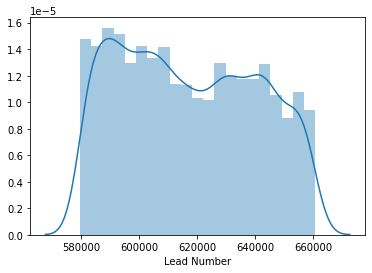

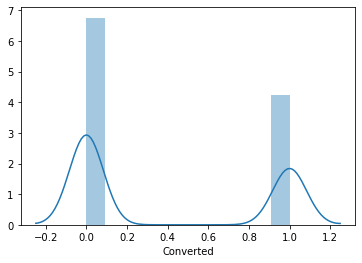

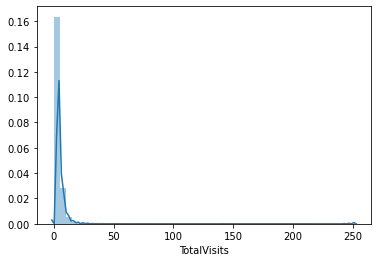

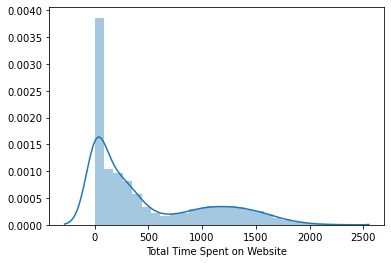

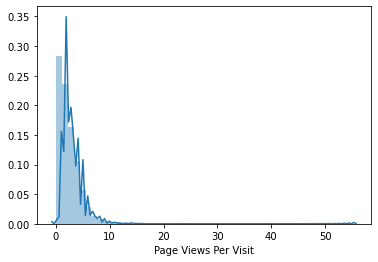

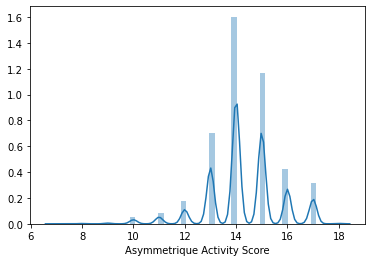

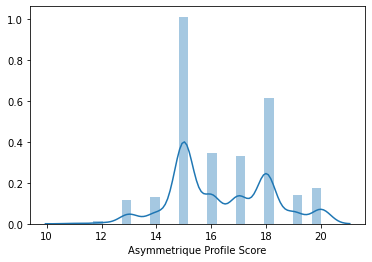

In [37]:
for val in num_Columns:
    sns.distplot(leads[val])
    plt.show()

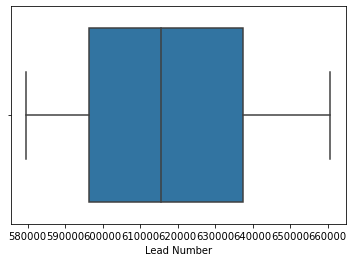

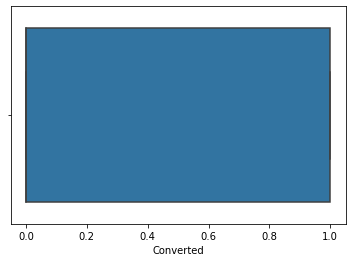

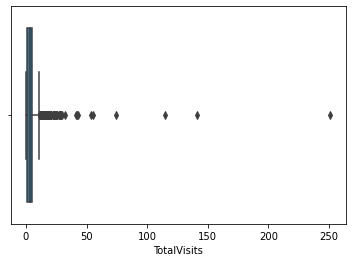

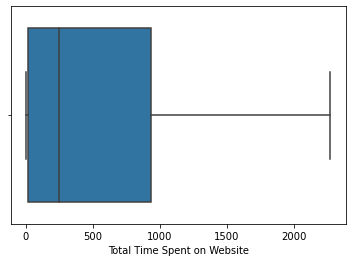

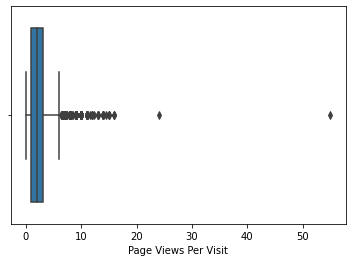

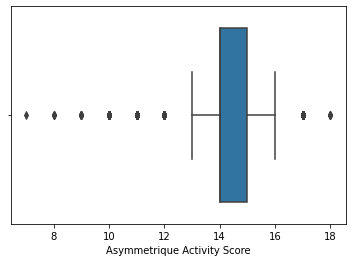

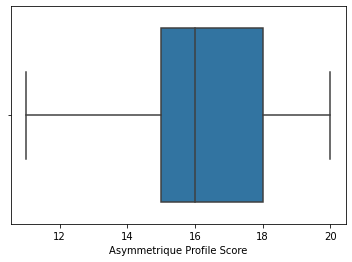

In [38]:
for val in num_Columns:
    sns.boxplot(leads[val])
    plt.show()

**Inference**
* Data under Numerical Columns does not have a normal distribution
* There are outliers in TotalVisits,Page Views Per Visit, Asymmetrique Activity Score

# Data Frame - Sanity Check

In [39]:
# Let's see the type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Inference**
* There seems to be some Null values in many columns

In [40]:
#Let's see the Percentage of Null Values in each Columns; as we learnt from our experience that we can drop the columns with more than 45% null values. 

In [41]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=False)

In [42]:
#Calling the Missing Function

leads_missing=missing_data(leads)
leads_missing

,Total,Percent,Unique,Data_Type
Lead Quality,4767,51.590909,5,object
Asymmetrique Activity Index,4218,45.649351,3,object
Asymmetrique Profile Score,4218,45.649351,10,float64
Asymmetrique Activity Score,4218,45.649351,12,float64
Asymmetrique Profile Index,4218,45.649351,3,object
Tags,3353,36.287879,26,object
Lead Profile,2709,29.318182,6,object
What matters most to you in choosing a course,2709,29.318182,3,object
What is your current occupation,2690,29.112554,6,object
Country,2461,26.634199,38,object


**Inference**
* Let's drop the columns having >45% null values as imputing will lead to skewness
* Also columns like the Prospect ID, Lead Number, Tags, Lead Profile etc to be dropped as they would not add value in model building

In [43]:
drop_cols = ['Prospect ID','Lead Number','Lead Profile',
                'Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score',
               'Asymmetrique Activity Index','Asymmetrique Profile Index','Tags']

In [44]:
#dropping columns having null values >45%

leads.drop(drop_cols, 1, inplace = True)
len(leads.columns)

28

In [45]:
# We have dropped 9 columns that we believed would not add values in model building process. Lets now see the remaining columns and their missing values percentage

In [46]:
leads_missing=missing_data(leads)
leads_missing

,Total,Percent,Unique,Data_Type
What matters most to you in choosing a course,2709,29.318182,3,object
What is your current occupation,2690,29.112554,6,object
Country,2461,26.634199,38,object
How did you hear about X Education,2207,23.885281,10,object
Specialization,1438,15.562771,19,object
City,1420,15.367965,7,object
TotalVisits,137,1.482684,41,float64
Page Views Per Visit,137,1.482684,114,float64
Last Activity,103,1.114719,17,object
Lead Source,36,0.389610,21,object


## Handling Null Values - Feature by Feature

In [47]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


#### Feature Name - What matters most to you in choosing a course

In [48]:
leads['What matters most to you in choosing a course'].isnull().sum()

2709

In [49]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

**Inference**
* 29.31% data is Null. We see most of leads have chosen "Better Career Prospects". Let's impute the Null Values with the same

In [50]:
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [51]:
#Let's check if still any Null values present in the column 'What matters most to you in choosing a course'

In [52]:
leads['What matters most to you in choosing a course'].isnull().sum()

0

#### Feature Name - What is your current occupation

In [53]:
leads['What is your current occupation'].isnull().sum()

2690

In [54]:
leads['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

**Inference**
* 29.11% data is Null. We see most of leads have chosen "Unemployed". Let's impute the Null Values with the same

In [55]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [56]:
leads['What is your current occupation'].isnull().sum()

0

#### Feature Name - Country

In [57]:
leads['Country'].isnull().sum()

2461

In [58]:
leads['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Nigeria                  0.059006
Canada                   0.059006
Germany                  0.059006
Kuwait                   0.059006
South Africa             0.059006
Sweden                   0.044254
Italy                    0.029503
Ghana                    0.029503
Uganda                   0.029503
Bangladesh               0.029503
Asia/Pacific Region      0.029503
Netherlands              0.029503
China                    0.029503
Philippines              0.029503
Belgium                  0.029503
Malaysia                 0.014751
Sri Lanka     

**Inference**
95.7% leads from India. 

This feature would not be significant / driving factor for conversion as irrespective of the country, the features driving the conversion would be different

In [59]:
leads['Country'] = leads['Country'].replace(np.nan, 'India')

In [60]:
leads['Country'].isnull().sum()

0

In [61]:
leads.drop('Country', 1, inplace = True)

In [62]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


#### Feature Name - How did you hear about X Education

In [63]:
leads['How did you hear about X Education'].isnull().sum()

2207

In [64]:
leads['How did you hear about X Education'].value_counts(normalize=True)*100	

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64

**Inference**
Does this feature matter in lead conversion? Not really! Let's drop this feature.

In [65]:
leads.drop('How did you hear about X Education', 1, inplace = True)

In [66]:
len(leads.columns)

26

In [67]:
leads_missing=missing_data(leads)
leads_missing

,Total,Percent,Unique,Data_Type
Specialization,1438,15.562771,19,object
City,1420,15.367965,7,object
TotalVisits,137,1.482684,41,float64
Page Views Per Visit,137,1.482684,114,float64
Last Activity,103,1.114719,17,object
Lead Source,36,0.389610,21,object
Lead Origin,0,0.000000,5,object
Newspaper,0,0.000000,2,object
A free copy of Mastering The Interview,0,0.000000,2,object
I agree to pay the amount through cheque,0,0.000000,1,object


#### Feature Name - How did you hear about X Education

In [68]:
leads['Specialization'].isnull().sum()

1438

In [69]:
leads['Specialization'].value_counts(normalize=True)*100	

Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Media and Advertising                 2.601897
Travel and Tourism                    2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64

**Inference**
Unlike earlier imputation methods, it's tricky here; as we can't go with the Category that got selected the most. Both Statistically and from Business point of view. Let's hence create a new category called 'Others'

In [70]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

In [71]:
leads['Specialization'].isnull().sum()

0

#### Feature Name - City

In [72]:
leads['City'].isnull().sum()

1420

In [73]:
leads['City'].value_counts(normalize=True)*100	

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

**Inference**
From the above result, many leads have not selected any City. Hence it does not make any sense to skew the data by just selecting Mumbai (if we were to go with choice most of the leads have chosen). Hence lets decide to drop this feature

In [74]:
leads.drop('City',axis=1, inplace = True)

In [75]:
len(leads.columns)

25

#### Feature Name - TotalVisits

In [76]:
leads['TotalVisits'].isnull().sum()

137

In [77]:
# It's a Numerical Feature. Let's check if we can impute with Mean value if there are no outliers

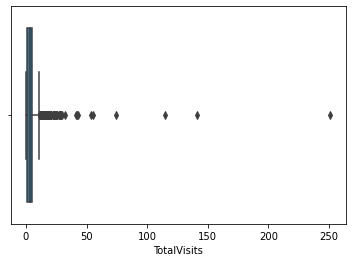

In [78]:
sns.boxplot(leads['TotalVisits'])

**Inference**
Since there are outliers, the mean also get impacted relatively. Hence lets go with Median. Let's not cap the outlier values to keep the actual scenario unaltered that those many visits are made by the leads

In [79]:
leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [80]:
leads['TotalVisits'].median()

3.0

In [81]:
leads['TotalVisits'].fillna(leads['TotalVisits'].median(), inplace=True)

In [82]:
leads['TotalVisits'].isnull().sum()

0

#### Feature Name - Page Views Per Visit

In [83]:
leads['Page Views Per Visit'].isnull().sum()

137

In [84]:
# It's a Numerical Feature. Let's check if we can impute with Mean value if there are no outliers

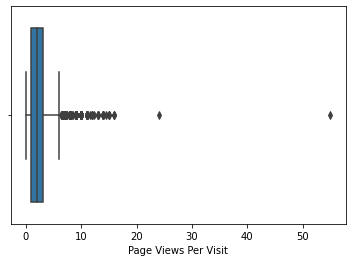

In [85]:
sns.boxplot(leads['Page Views Per Visit'])

**Inference** Since there are outliers, the mean also get impacted relatively. Hence lets go with Median. Let's not cap the outlier values to keep the actual scenario unaltered.

In [86]:
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(), inplace=True)

In [87]:
leads['Page Views Per Visit'].isnull().sum()

0

In [88]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


#### Feature Name - Last Activity

In [89]:
leads['Last Activity'].isnull().sum()

103

In [90]:
leads['Last Activity'].value_counts(normalize=True)*100	

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Marked Spam                0.021889
Email Received                   0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

**Inference**
We don't see one familar activity among all leads. Let's park the null values under 'Others' category. We have seen similar scenario in one of the above features

In [91]:
leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'Others')

In [92]:
leads['Last Activity'].isnull().sum()

0

#### Feature Name - Lead Source

In [93]:
leads['Lead Source'].isnull().sum()

36

In [94]:
leads['Lead Source'].value_counts(normalize=True)*100	

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
blog                  0.010865
NC_EDM                0.010865
testone               0.010865
WeLearn               0.010865
youtubechannel        0.010865
welearnblog_Home      0.010865
Pay per Click Ads     0.010865
Name: Lead Source, dtype: float64

**Inference**
We don't see one familar activity among all Channels. However, we know that Google is one of the Lead sources. Let's impute with 'Google'
Also we see, there are two categories with 'Google'; but with a typo. Lets merge in to one.

In [95]:
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Google')

In [96]:
leads['Lead Source'].isnull().sum()

0

In [97]:
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

In [98]:
leads['Lead Source'].value_counts(normalize=True)*100	

Google               31.482684
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
blog                  0.010823
NC_EDM                0.010823
testone               0.010823
WeLearn               0.010823
youtubechannel        0.010823
welearnblog_Home      0.010823
Pay per Click Ads     0.010823
Name: Lead Source, dtype: float64

In [99]:
#Let's take a look at Features; whether they still have Null Values

In [100]:
leads_missing=missing_data(leads)
leads_missing

,Total,Percent,Unique,Data_Type
Lead Origin,0,0.0,5,object
Magazine,0,0.0,1,object
A free copy of Mastering The Interview,0,0.0,2,object
I agree to pay the amount through cheque,0,0.0,1,object
Get updates on DM Content,0,0.0,1,object
Update me on Supply Chain Content,0,0.0,1,object
Receive More Updates About Our Courses,0,0.0,1,object
Through Recommendations,0,0.0,2,object
Digital Advertisement,0,0.0,2,object
Newspaper,0,0.0,2,object


**Inference**
We see all features' which earlier had null values have been treated.

# Exploratory Data Analysis

## Univariate Analysis - Categorical Features

In [101]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


**Observation**
Could see a pattern that most of the features are categorical except 4 Numerical Features
Let's get to understand different categories under each Categorical Feature and in which Category the Conversion is observed to be more

In [102]:
#As the depiction is going to be uniform for the categorical variable, lets optimize the code in defining a function

In [103]:
def univariate_catg_analysis(feature,label_rotation=False):
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
    
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=leads,
                     palette='Paired')
    
    #Setting Title
    title = feature+" - Categorize wise Data"
    ax1.set_title(title, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
     #Setting Legend Orientation
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
        
  
    feature_catg_conv_perc = leads[[feature, 'Converted']].groupby([feature],as_index=False).mean()
    feature_catg_conv_perc["Converted"] = feature_catg_conv_perc["Converted"]*100
    feature_catg_conv_perc.sort_values(by='Converted', ascending=False, inplace=True)
    
   # s = sns.barplot(ax=ax2,feature_catg_conv_perc[feature],feature_catg_conv_perc['Converted'])
    
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='Converted', 
                    order=feature_catg_conv_perc[feature], 
                    data=feature_catg_conv_perc,
                    palette='Paired')
    
    #Setting Title
    ax2.set_title(feature + " - Lead Converted Percentage (Category wise)", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
     #Setting Legend Orientation
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
        
    plt.ylabel('Percentage of Leads Conversion', fontsize=10)
    plt.xlabel(feature,fontsize=10) 
    plt.tick_params(axis='both', which='major', labelsize=10)
    

    plt.show();

#### Lead Origin

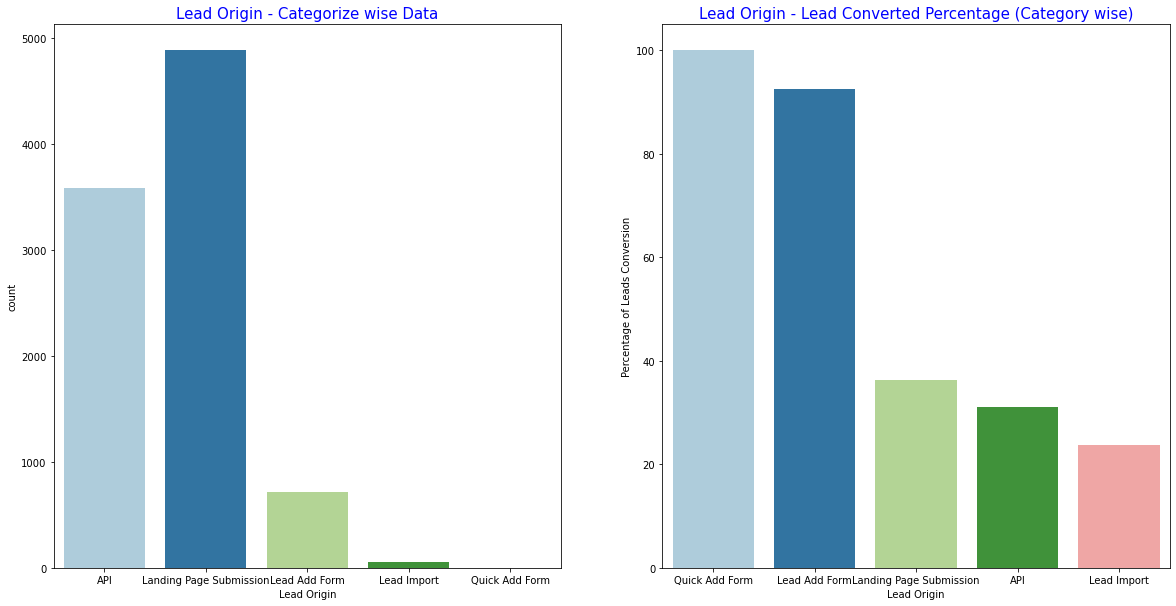

In [104]:
univariate_catg_analysis('Lead Origin')

**Inference** 
1. Lot of leads originate in Landing Page Submission, followed by API and Lead Add Form
2. Sources where the conversion rate seems to be good is in the Order of Quick Add Form, Lead Add Form and Landing Page Submission
3. Lead Import as a Lead Origin seems to be ineffective so as with the conversion rate

#### Lead Source

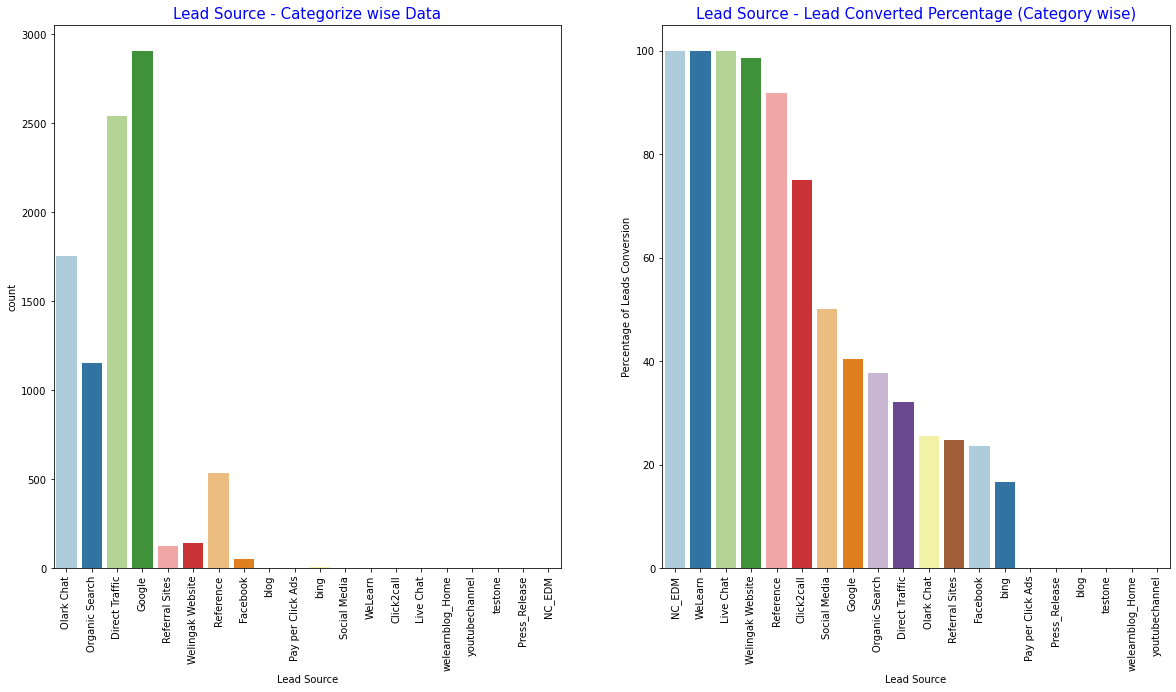

In [105]:
univariate_catg_analysis('Lead Source',True)

**Inference**
1. Google is observed to be high performing lead source, followed by Direct Traffic, Olark Chat
2. From Conversion view point, Google has a pretty decent conversion rate in comparison to the volume. 
3. Other lead sources in the order of conversion effectiveness are Direct Traffic, Organic Search and Olark Chat

#### Do Not Email

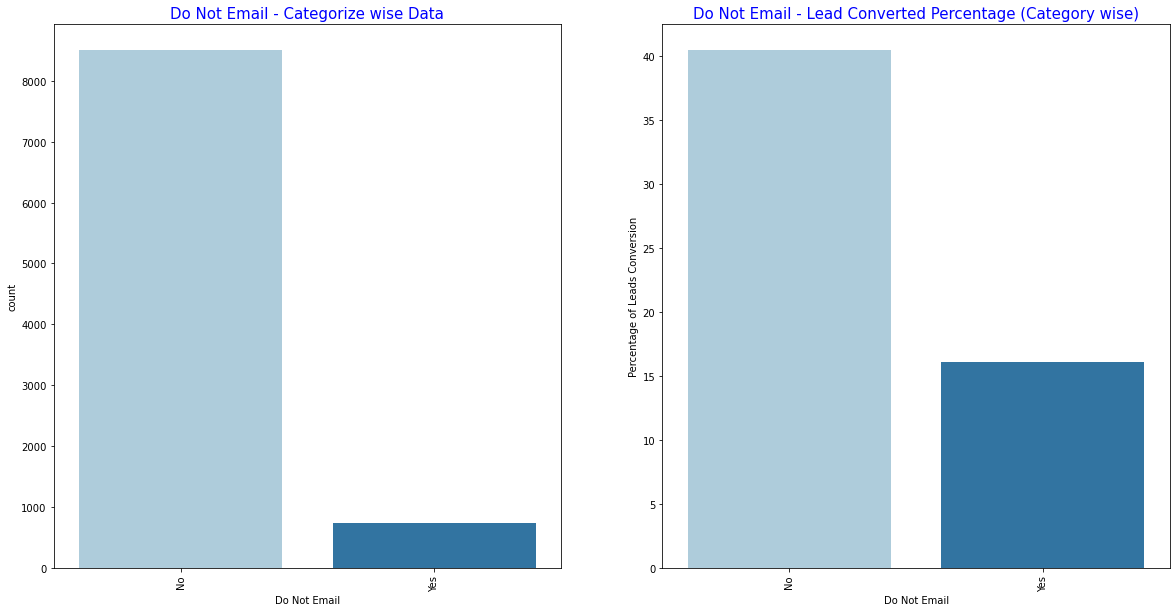

In [106]:
univariate_catg_analysis('Do Not Email',True)

**Inference**
No of leads have shown interest in getting mail updates is high. Such leads conversion rate is at 40% and leads who are not ok to receive mail update, conversion rate is also less; which stands at 15%

#### Do Not Call

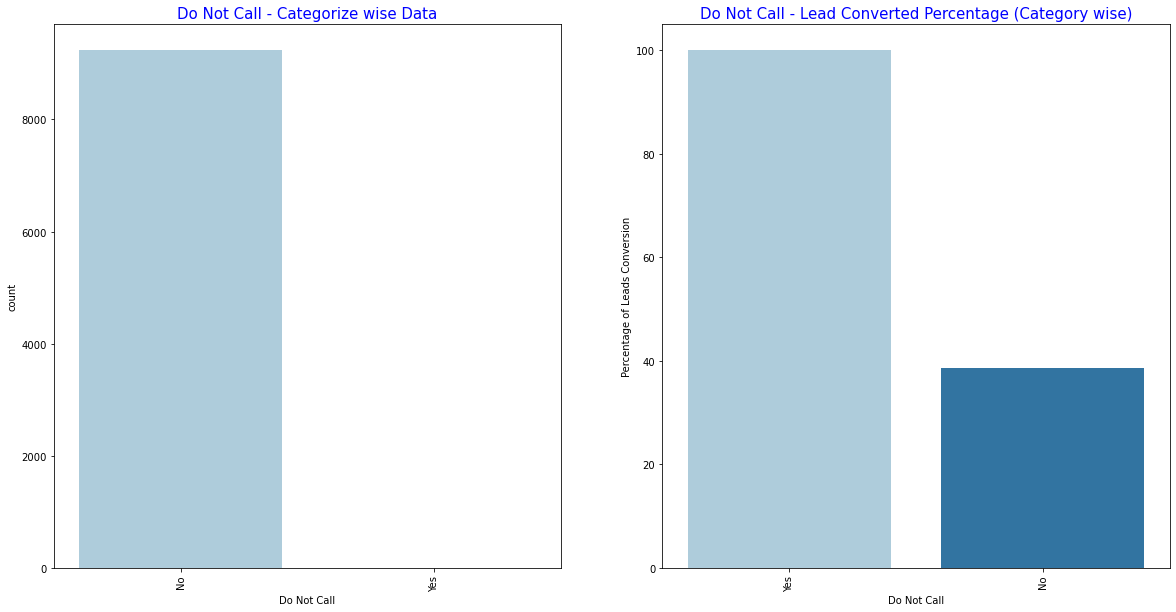

In [107]:
univariate_catg_analysis('Do Not Call',True)

**Inference**
No of leads have shown interest in getting call updates is high. However, such leads conversion rate is at 40% and leads who are not ok to receive calls is very low; but the conversion rate is 100%. As the data is not balanced, this feature shall be treated insignificant for Model building.

#### Last Activity

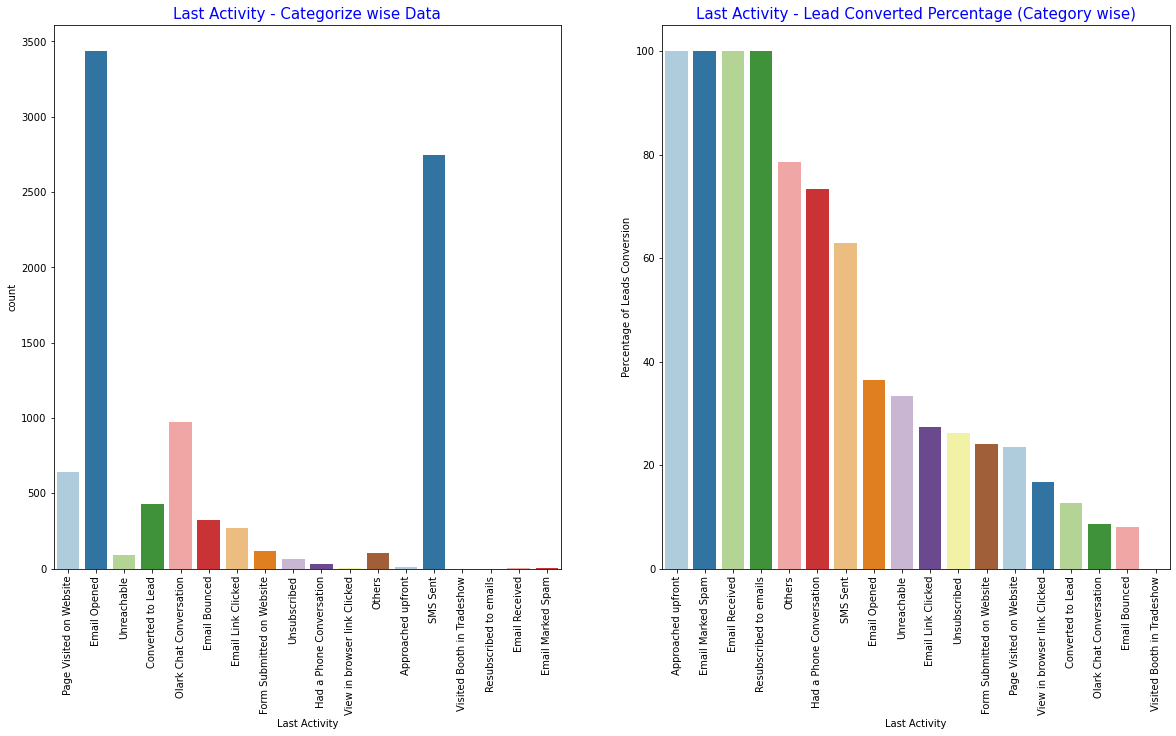

In [108]:
univariate_catg_analysis('Last Activity',True)

**Inference**
There are higher number of leads who have their Email Opened, followed by SMS Sent
However, leads conversion with SMS sent seem to be higher (60%) compared to the leads with last activity as Email Opened

#### Specialization

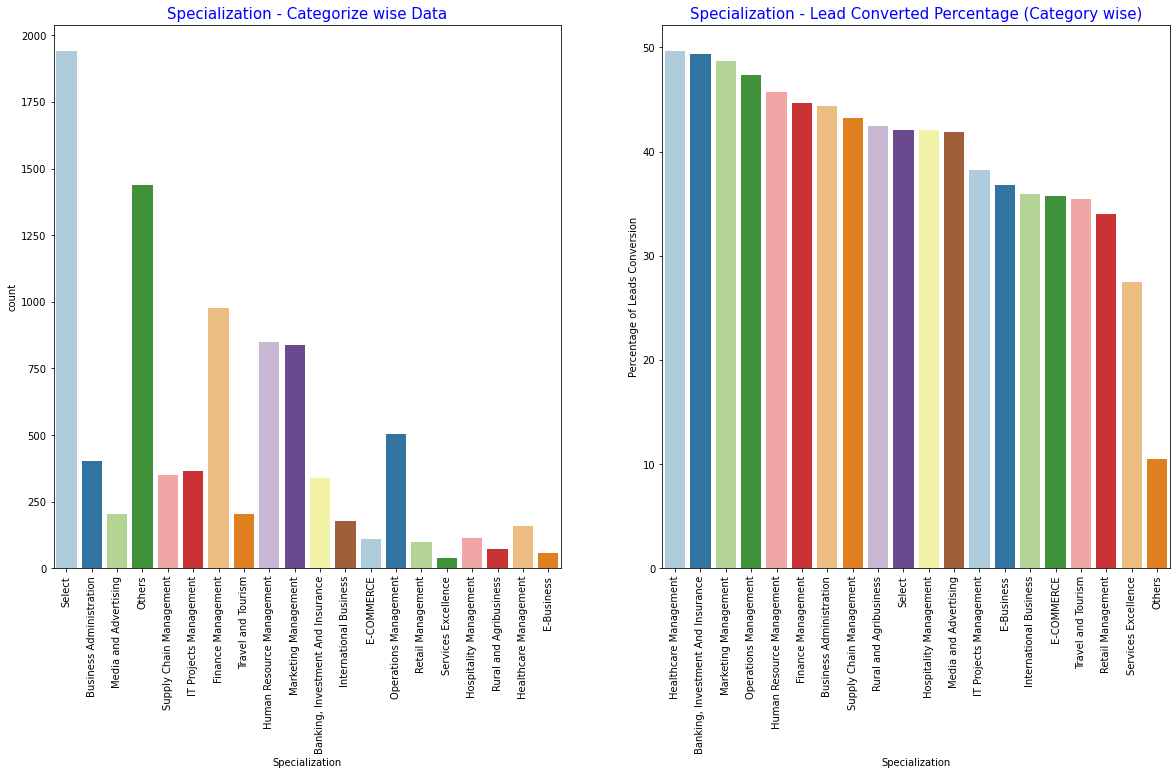

In [109]:
univariate_catg_analysis('Specialization',True)

**Inference**
There are lot of leads who have not chosen any value for Specialization. Such leads conversion is little over 40%. There are few leads' specialization seems to be other than the ones listed in the form. Such leads conversation rate is at 10%

#### What is your current occupation

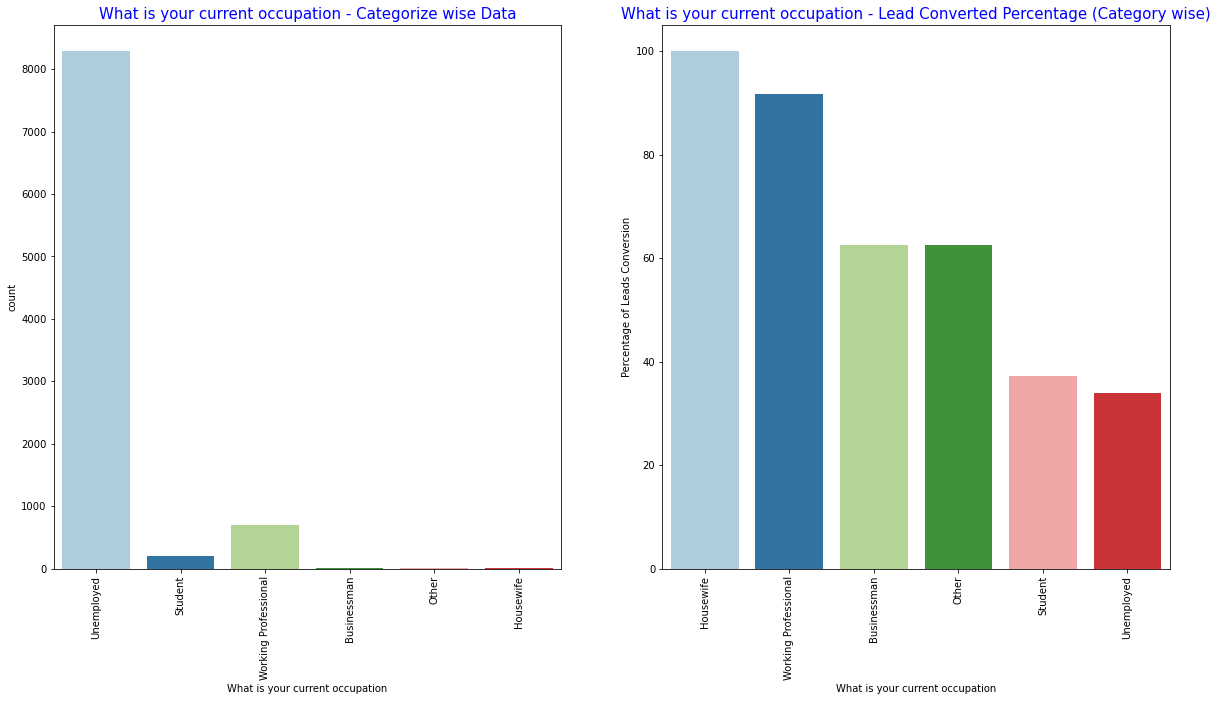

In [110]:
univariate_catg_analysis('What is your current occupation',True)

**Inference**
Leads who are not employed, their conversation rate is little above 35%
Next in order are Working Professionals and their conversation rate is above 80%

#### What matters most to you in choosing a course

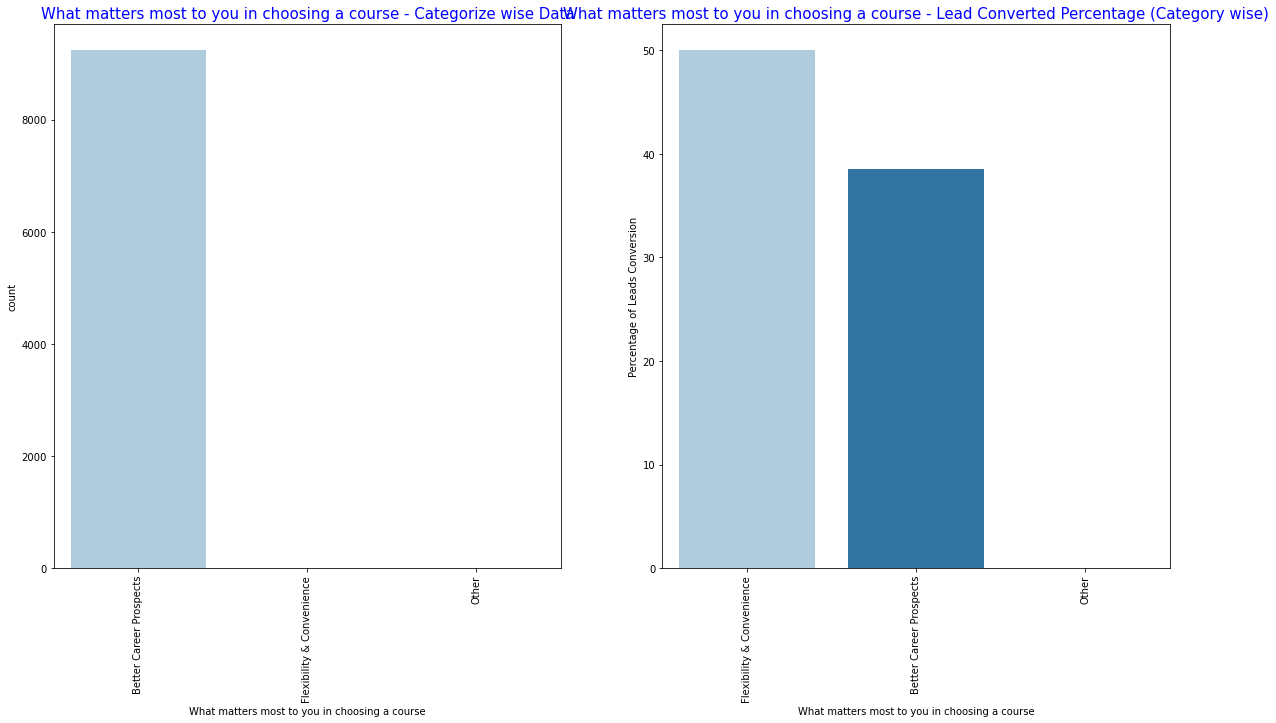

In [111]:
univariate_catg_analysis('What matters most to you in choosing a course',True)

**Inference**
Leads who are looking for Better Career prospects are high and their conversation rate is close to 40%

#### Influencing Factor of Ads in Leads Conversion

##### Search

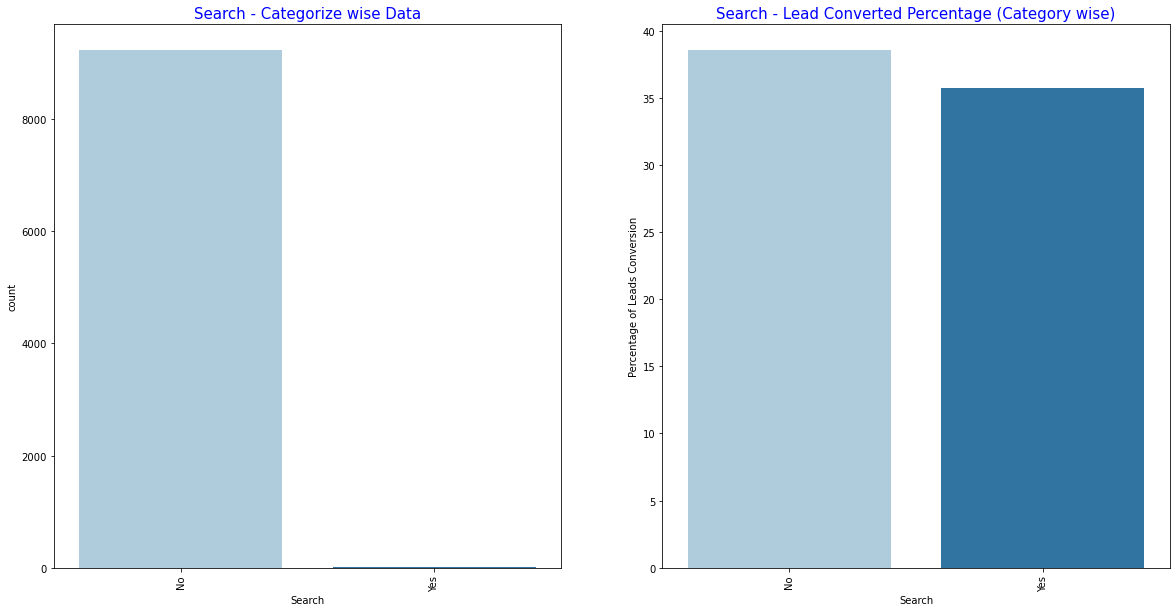

In [112]:
univariate_catg_analysis('Search',True)

**Inference**
Was there an influence of ads in leads conversion? Data does not convey though

##### Magazine

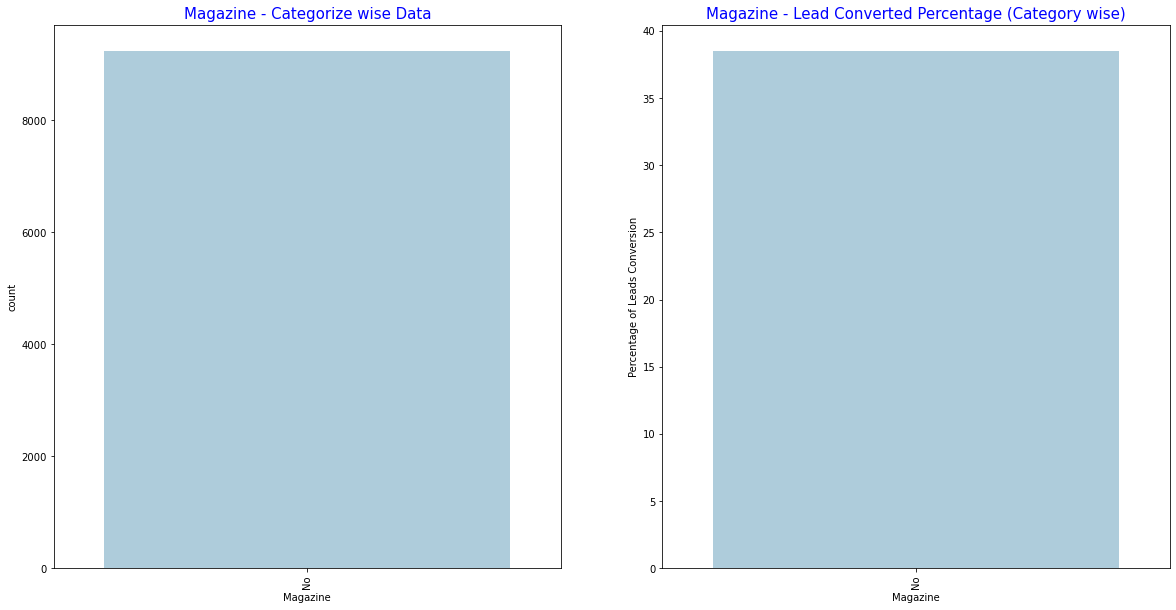

In [113]:
univariate_catg_analysis('Magazine',True)

##### Newspaper Article

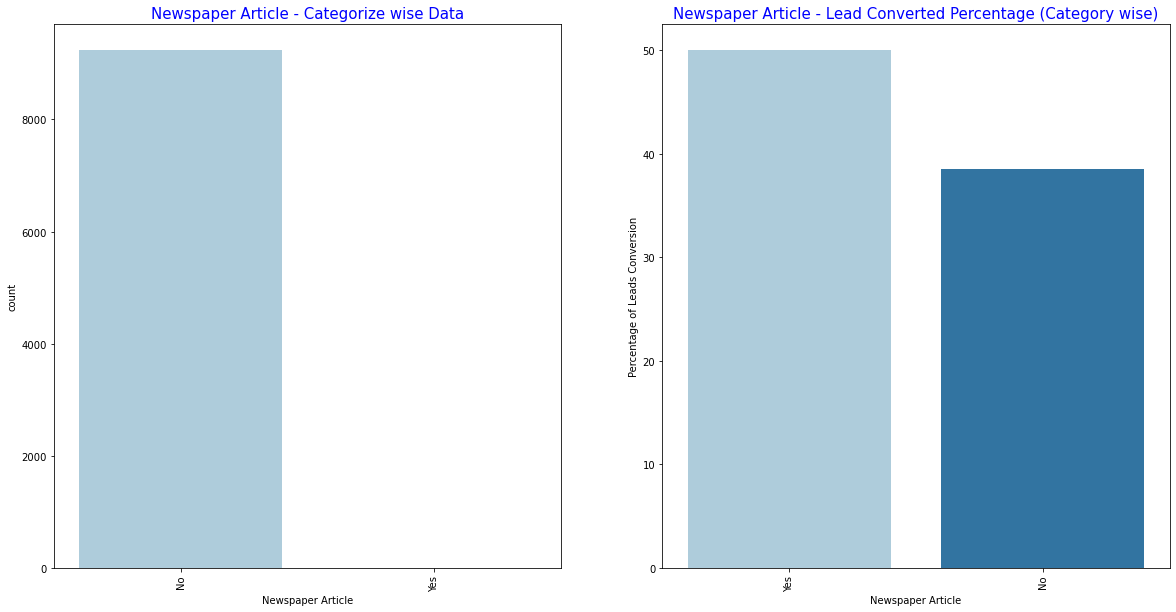

In [114]:
univariate_catg_analysis('Newspaper Article',True)

##### X Education Forums

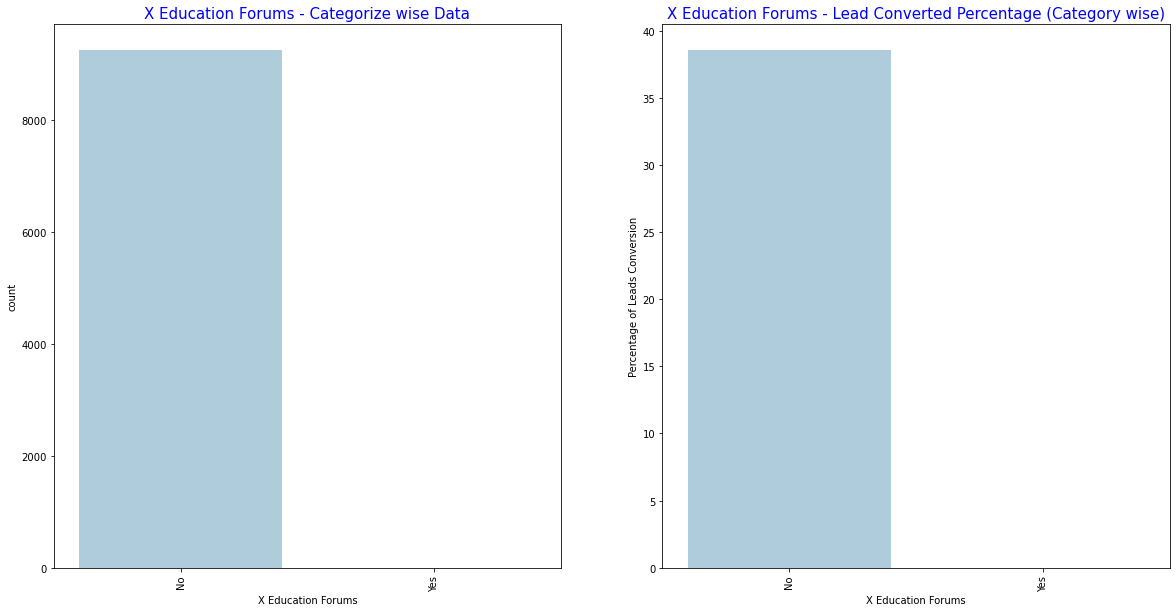

In [115]:
univariate_catg_analysis('X Education Forums',True)

##### Newspaper

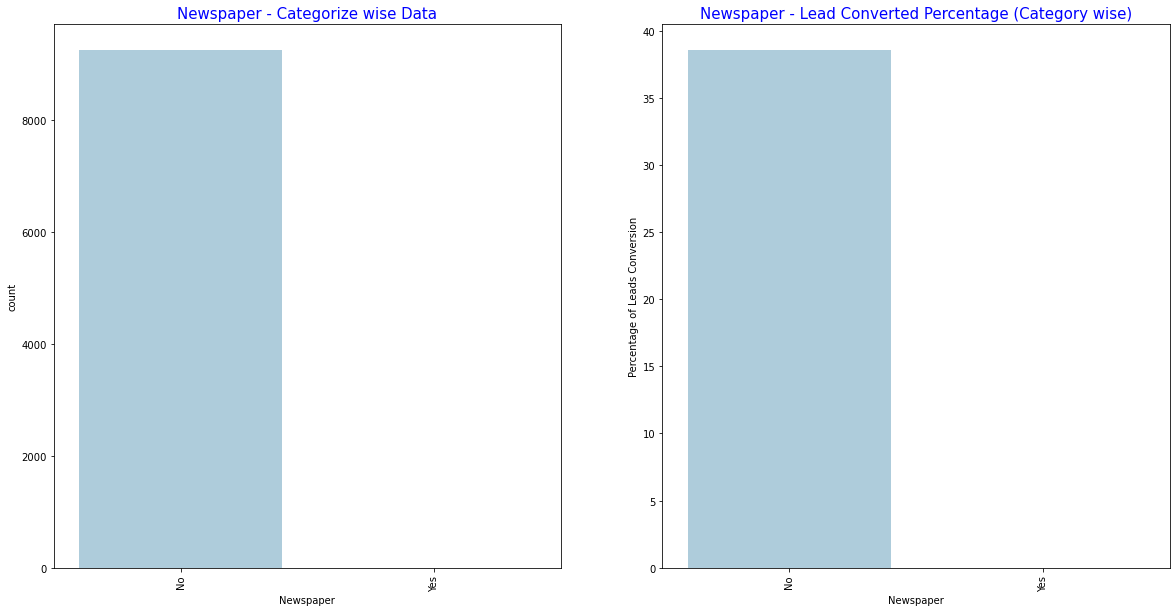

In [116]:
univariate_catg_analysis('Newspaper',True)

##### Digital Advertisement

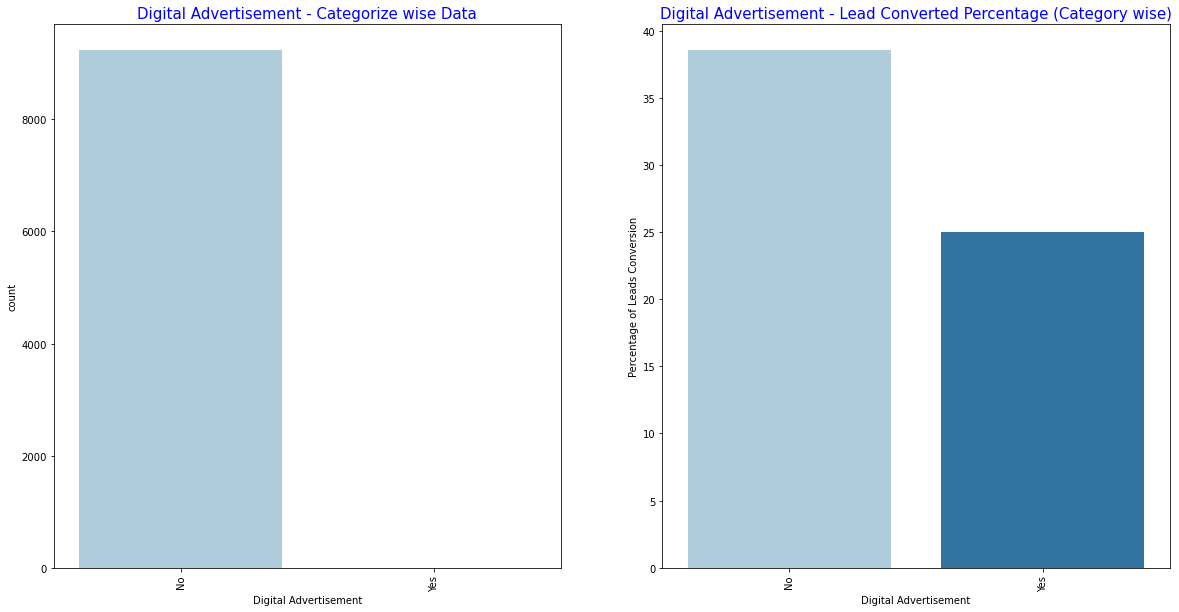

In [117]:
univariate_catg_analysis('Digital Advertisement',True)

##### Through Recommendations

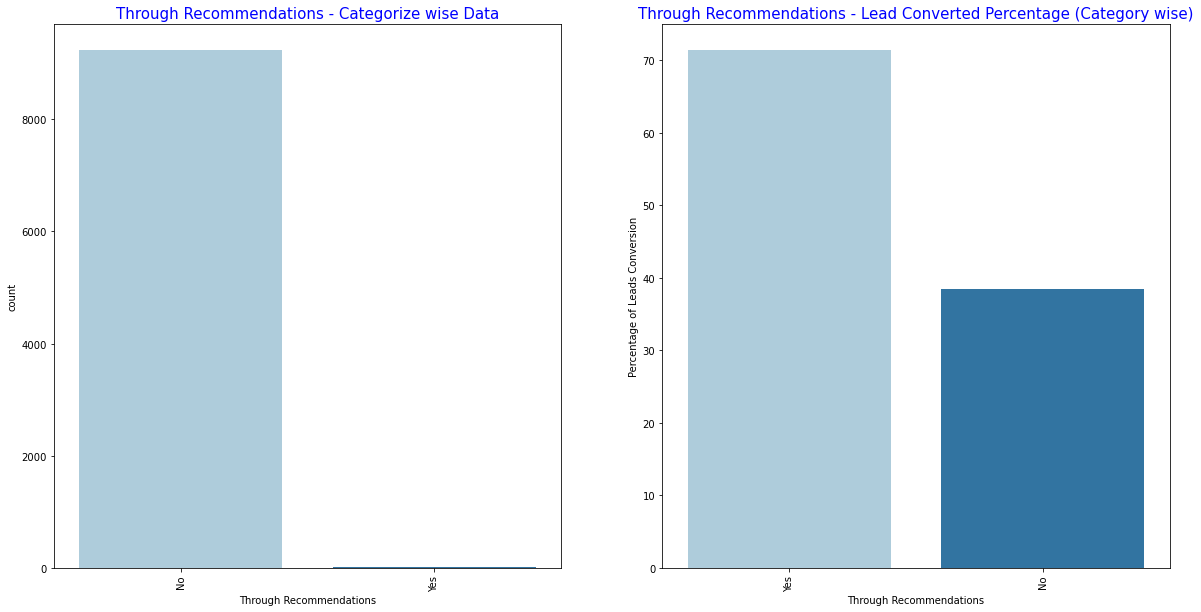

In [118]:
univariate_catg_analysis('Through Recommendations',True)

**Inference**
Not many leads came in through recommendation. However, the conversion is close to 40%. This does not seem to be an influencing factor as the leads who have come through recommendation is very less and it would not be driving parameter

##### Inference
There seems to be no correlation between leads signing up for course after checking the ad, magazine, newspaper etc. May be we need to remove these features before model building step

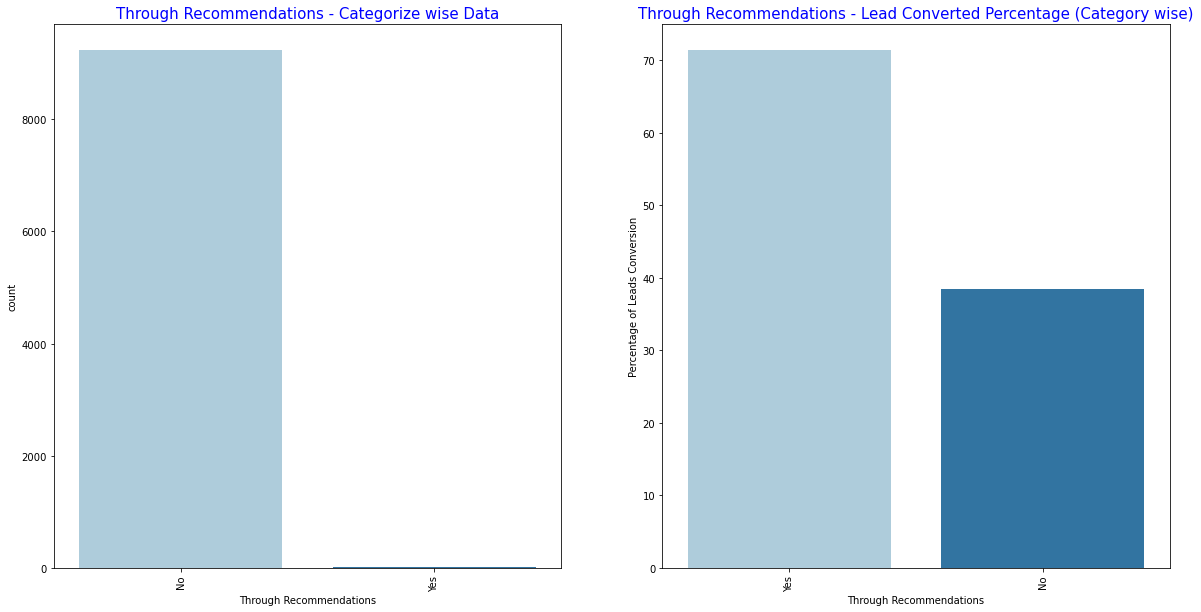

In [119]:
univariate_catg_analysis('Through Recommendations',True)

#### Features with no contrasting data / containing not more than one category

##### Receive More Updates About Our Courses

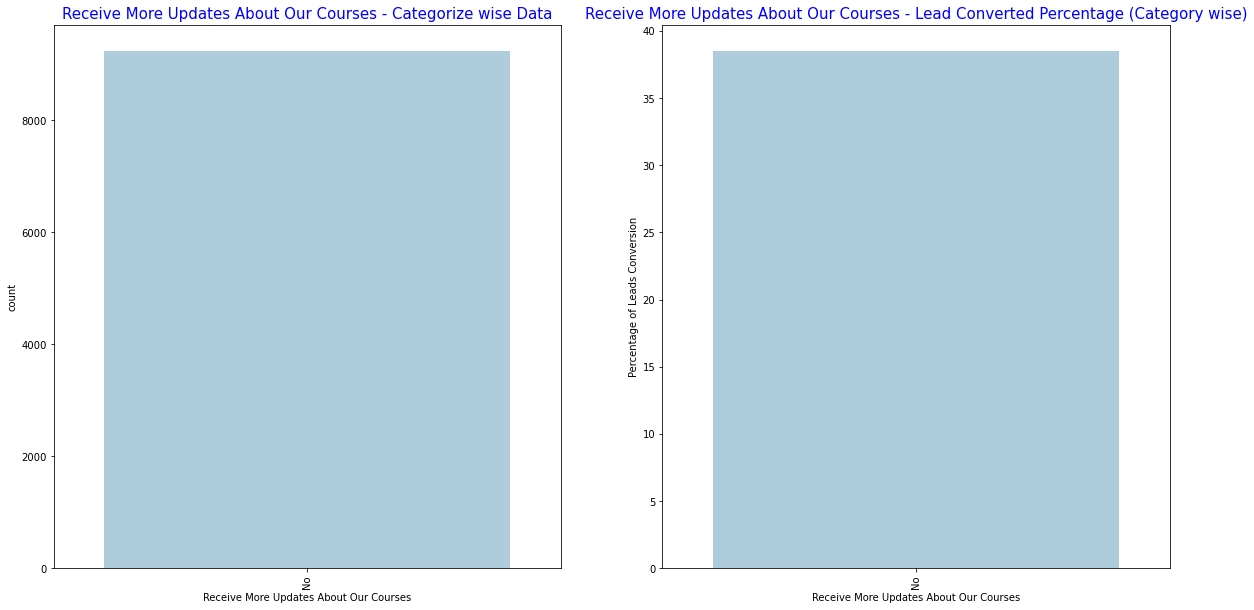

In [120]:
univariate_catg_analysis('Receive More Updates About Our Courses',True)

##### Update me on Supply Chain Content

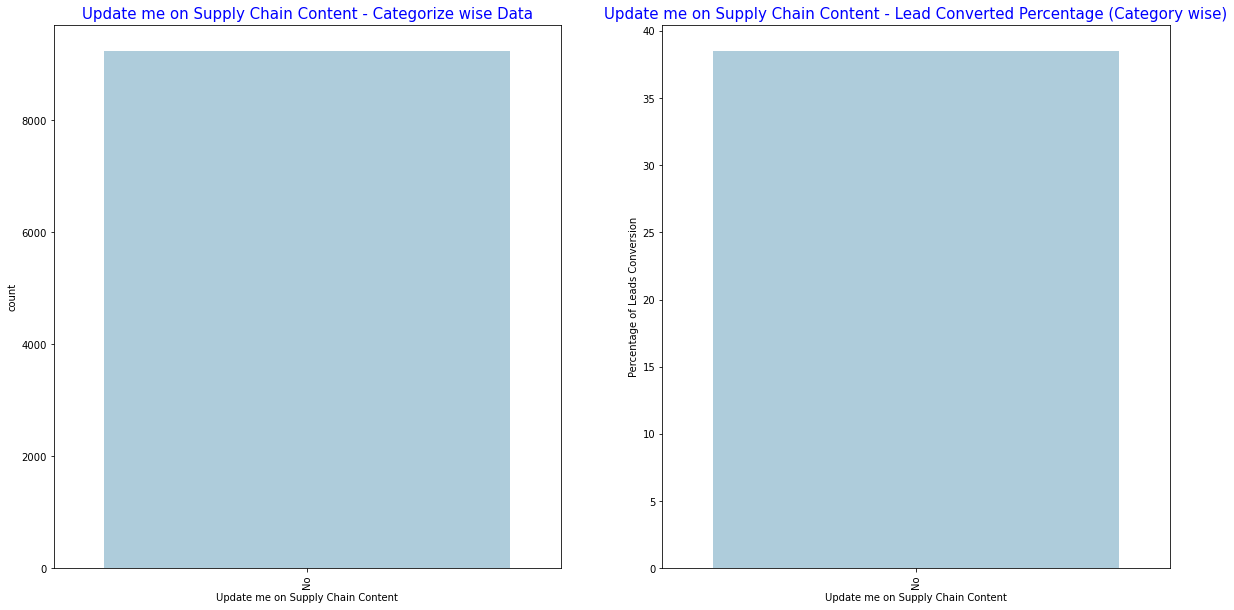

In [121]:
univariate_catg_analysis('Update me on Supply Chain Content',True)

**Inference**
No contrast data could be seen for us to consider this feature as important in model building process. 

##### Update me on Get updates on DM Content

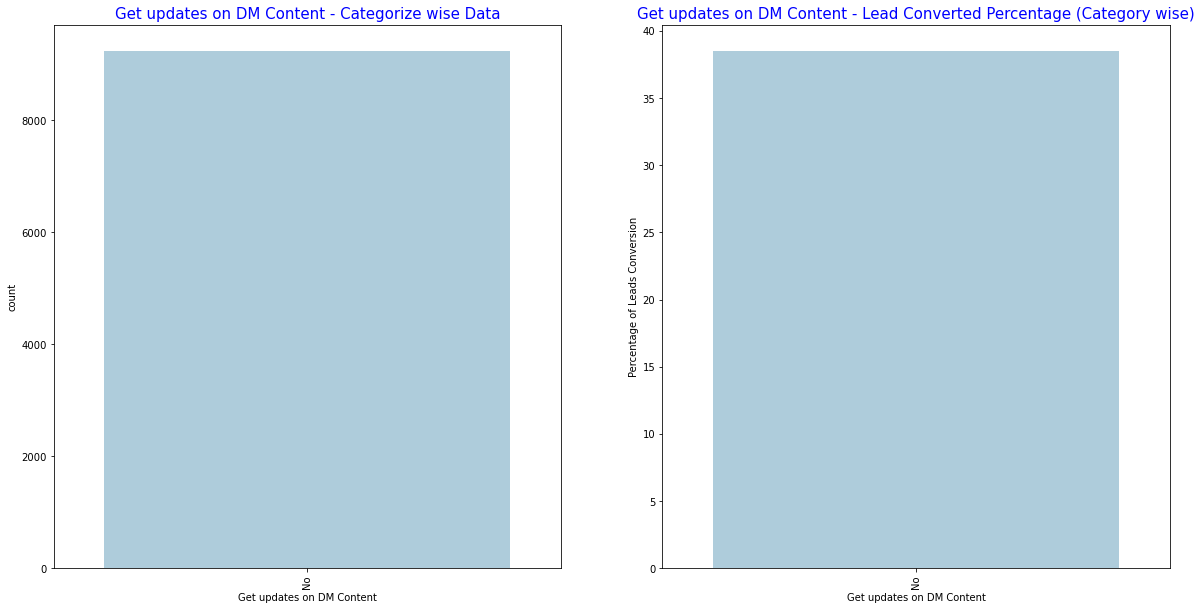

In [122]:
univariate_catg_analysis('Get updates on DM Content',True)

In [123]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


##### I agree to pay the amount through cheque

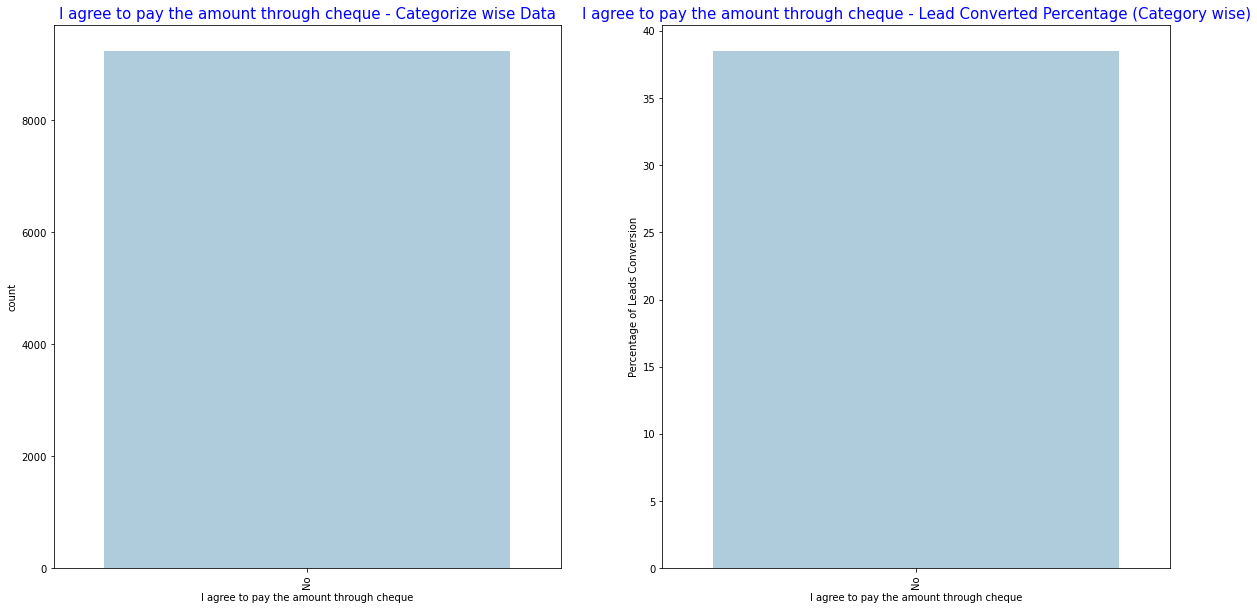

In [124]:
univariate_catg_analysis('I agree to pay the amount through cheque',True)

##### Inference
No contrast data could be seen for us to consider the above feature as important in model building process. 

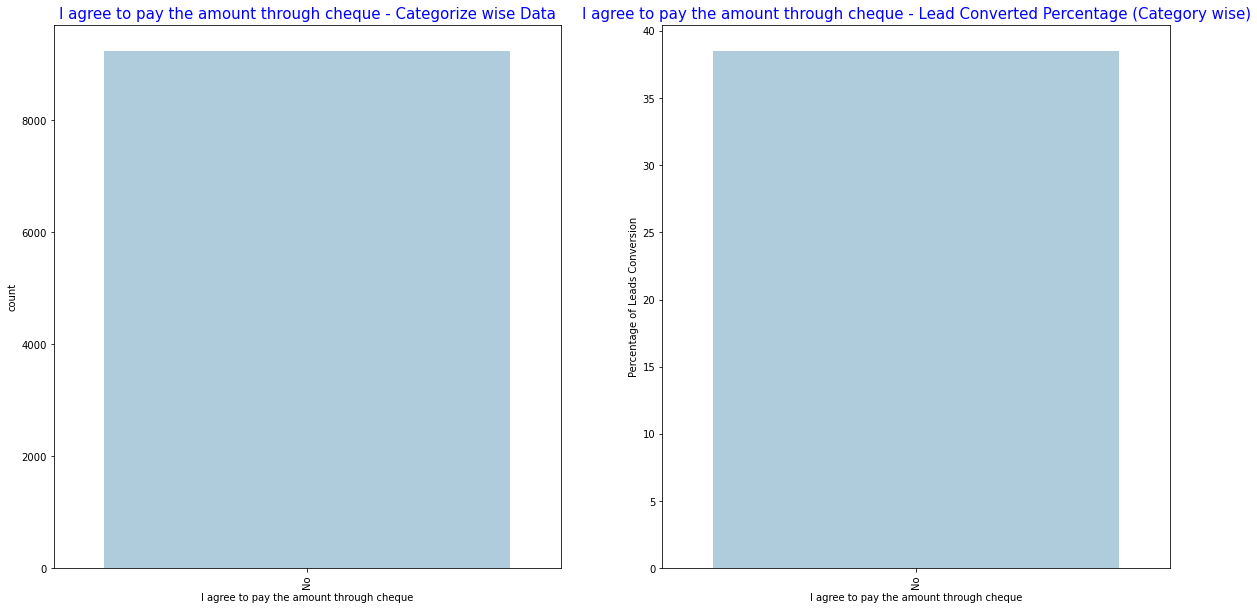

In [125]:
univariate_catg_analysis('I agree to pay the amount through cheque',True)

#### A free copy of Mastering The Interview

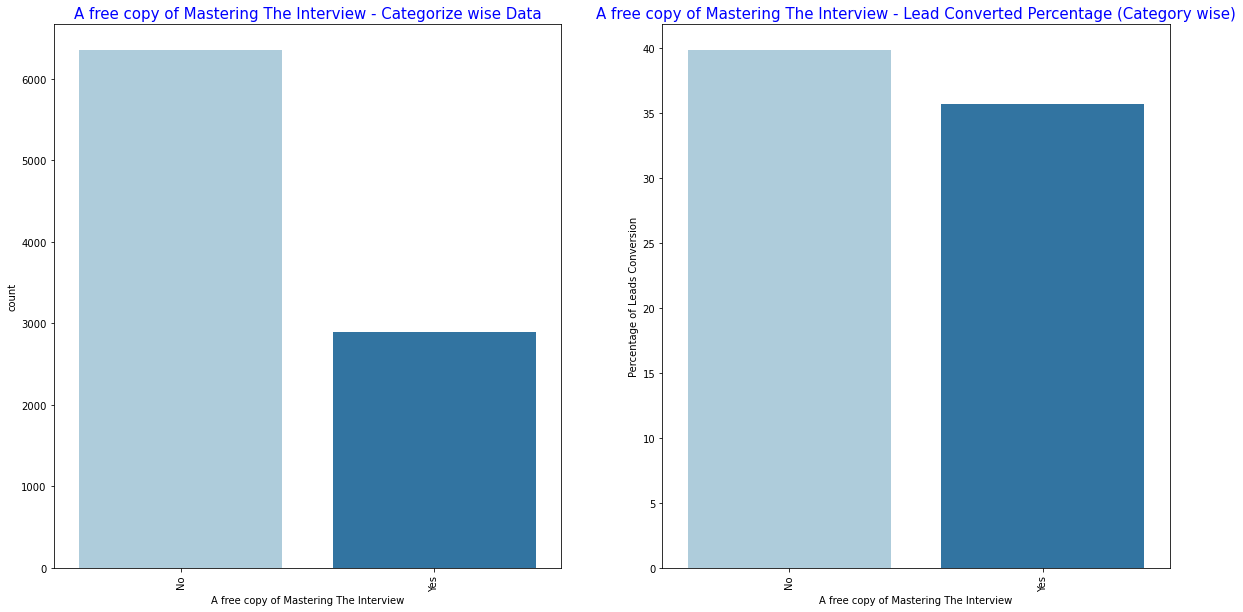

In [126]:
univariate_catg_analysis('A free copy of Mastering The Interview',True)

**Inference**
Leads who have not chosen a Free copy of Mastering the Interview are high; but still conversion of such leads choosing the course is at 40%. Seems to be there is no influence of this feature in conversion

#### Last Notable Activity

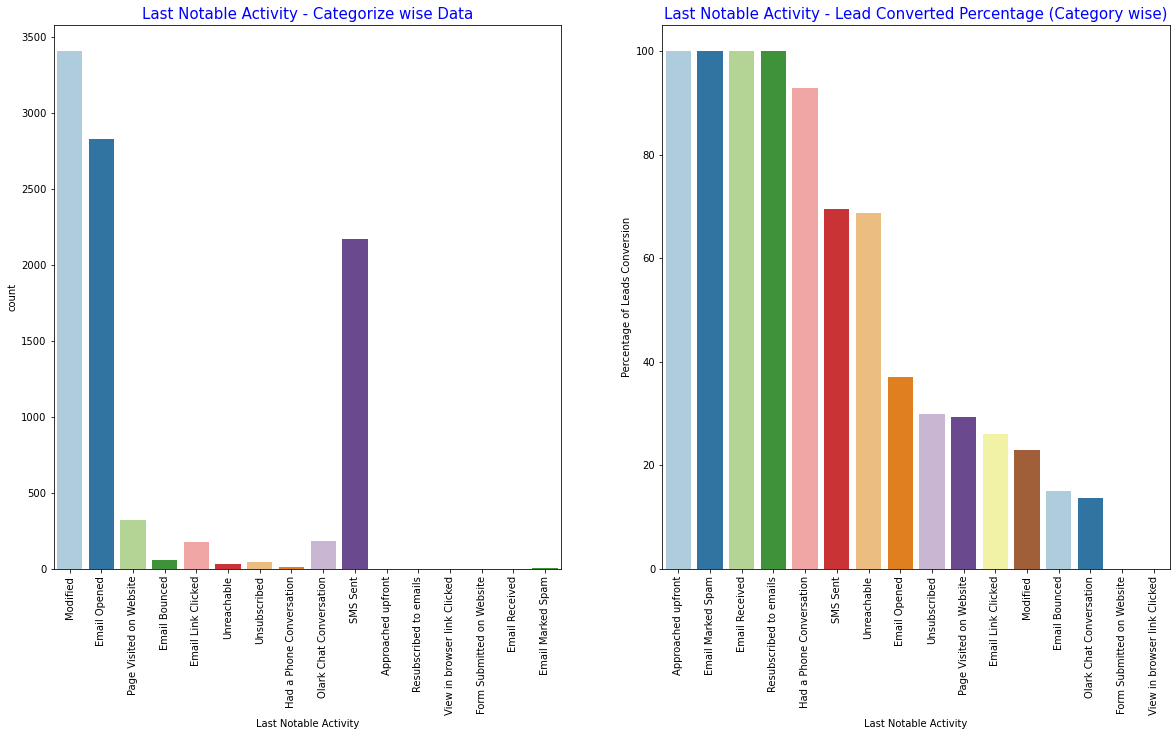

In [127]:
univariate_catg_analysis('Last Notable Activity',True)

**Inference**
Last notable activity of SMS sent has high conversion rate at close to 70% and Email Opened with conversion rate close to 40%

#### Actions related to Features that are insignificant

In [128]:
insignificant_features = ['Do Not Call','Search','Magazine' ,'Newspaper Article', 'X Education Forums','Newspaper',  'Digital Advertisement','A free copy of Mastering The Interview','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [129]:
leads.drop(insignificant_features, 1, inplace = True)
len(leads.columns)

12

In [130]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,Modified


In [131]:
leads['Last Notable Activity'].value_counts(normalize = True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Resubscribed to emails          0.000108
Approached upfront              0.000108
Email Received                  0.000108
Name: Last Notable Activity, dtype: float64

In [132]:
leads['Last Activity'].value_counts(normalize = True)

Email Opened                    0.371970
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
Others                          0.011147
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Marked Spam               0.000216
Email Received                  0.000216
Resubscribed to emails          0.000108
Visited Booth in Tradeshow      0.000108
Name: Last Activity, dtype: float64

In [133]:
#Looking at Last Activity and Last Notable Activity - We could see Last Activity being an effective one as we see results from actions like 'Converted to Lead'. Hence let's drop Last Notable Activity

In [134]:
leads.drop('Last Notable Activity', 1, inplace = True)
len(leads.columns)

11

In [135]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects


## Univariate Analysis - Numerical Features

In [136]:
#Check for Outliers

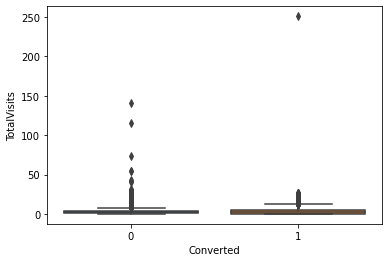

In [137]:
sns.boxplot(y=leads['TotalVisits'], x = leads['Converted'])
plt.show()

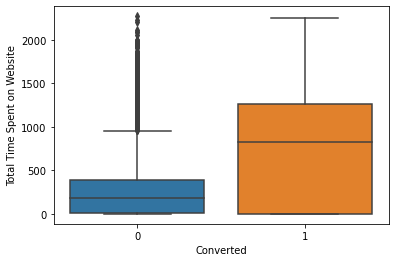

In [138]:
sns.boxplot(y=leads['Total Time Spent on Website'], x = leads['Converted'])
plt.show()

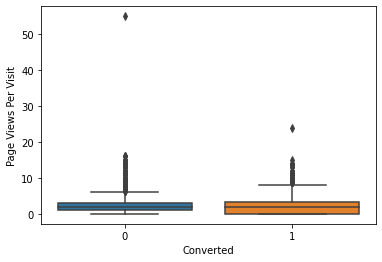

In [139]:
sns.boxplot(y=leads['Page Views Per Visit'], x = leads['Converted'])
plt.show()

**Inference**
Outliers observed in Page Views Per Visit and Total Visits. This would have impact in Model Building. We can cap the outlier

In [140]:
#Capping the data at 95% percetile value
Q4 = leads['TotalVisits'].quantile(0.95) 
leads.loc[leads['TotalVisits'] >= Q4, 'TotalVisits'] = Q4 

Q4 = leads['Page Views Per Visit'].quantile(0.95) 
leads.loc[leads['Page Views Per Visit'] >= Q4, 'Page Views Per Visit'] = Q4 

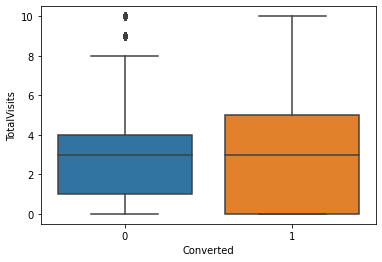

In [141]:
sns.boxplot(y=leads['TotalVisits'], x = leads['Converted'])
plt.show()

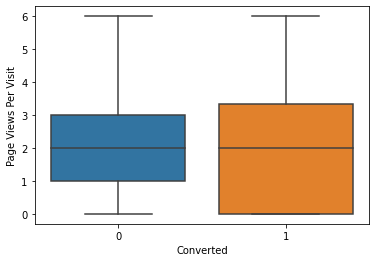

In [142]:
sns.boxplot(y=leads['Page Views Per Visit'], x = leads['Converted'])
plt.show()

# Data Preparation

In [143]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects


## Convert Features with Binary Values

In [144]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads['Do Not Email'] = binary_map(leads['Do Not Email'])

In [145]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects


## Creating Dummy Variables

In [146]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity','Specialization','What is your current occupation','What matters most to you in choosing a course']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [147]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [148]:
#Dropping Categorical Columns after dummy features creation

In [149]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course','Last Activity'], axis=1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Converted                                                                9240 non-null   int64  
 2   TotalVisits                                                              9240 non-null   float64
 3   Total Time Spent on Website                                              9240 non-null   int64  
 4   Page Views Per Visit                                                     9240 non-null   float64
 5   Lead Origin_Landing Page Submission                                      9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                                               

In [150]:
len(leads.columns)

71

In [151]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


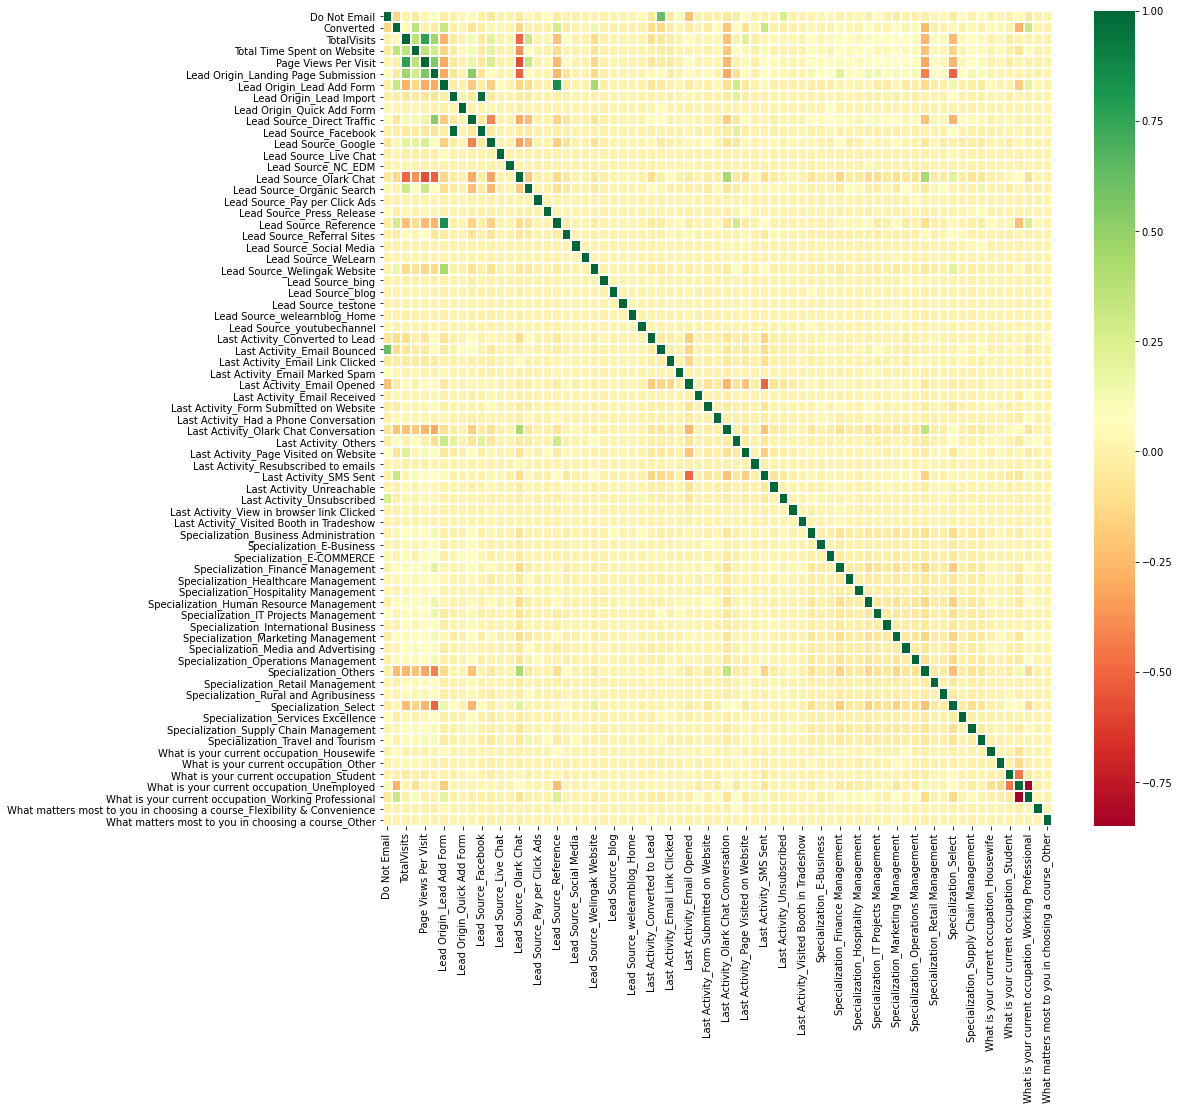

In [152]:
# Visualizing the data using heatmap
plt.figure(figsize=[15,15])
sns.heatmap(leads.corr(), cmap="RdYlGn",linewidth =1)
plt.show()

In [153]:
# We observe couple of features with high correlation indicated with Green colour. Let's see Top 10 Correlations

In [154]:
corr_lead = leads.corr()
corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape),k=1).astype(np.bool))
corr_df = corr_lead.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Top 10 Positive correlated variables
corr_df.head(10)

,VAR1,VAR2,Correlation
717,Lead Source_Facebook,Lead Origin_Lead Import,0.981709
1284,Lead Source_Reference,Lead Origin_Lead Add Form,0.853237
286,Page Views Per Visit,TotalVisits,0.767585
2059,Last Activity_Email Bounced,Do Not Email,0.618470
359,Lead Origin_Landing Page Submission,Page Views Per Visit,0.553423
644,Lead Source_Direct Traffic,Lead Origin_Landing Page Submission,0.528303
357,Lead Origin_Landing Page Submission,TotalVisits,0.453501
1568,Lead Source_Welingak Website,Lead Origin_Lead Add Form,0.430407
4061,Specialization_Others,Lead Source_Olark Chat,0.429177
2570,Last Activity_Olark Chat Conversation,Lead Source_Olark Chat,0.426248


In [155]:
corr_df.sort_values(by='Correlation', ascending=True, inplace=True)

# Top 10 Negatively correlated variables
corr_df.head(10)

,VAR1,VAR2,Correlation
4895,What is your current occupation_Working Profes...,What is your current occupation_Unemployed,-0.849653
998,Lead Source_Olark Chat,Page Views Per Visit,-0.573334
999,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.512950
4265,Specialization_Select,Lead Origin_Landing Page Submission,-0.507078
2872,Last Activity_SMS Sent,Last Activity_Email Opened,-0.500317
996,Lead Source_Olark Chat,TotalVisits,-0.500094
4823,What is your current occupation_Unemployed,What is your current occupation_Student,-0.450486
4052,Specialization_Others,Lead Origin_Landing Page Submission,-0.424285
790,Lead Source_Google,Lead Source_Direct Traffic,-0.417704
997,Lead Source_Olark Chat,Total Time Spent on Website,-0.376768


# Test-Train Split

In [156]:
# target variable
Y = leads['Converted']
X = leads.drop(['Converted'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [157]:
#Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (6468, 70)
 Shape of y_train is :  (6468,)
 Shape of X_test is  :  (2772, 70)
 Shape of y_test is  :  (2772,)


In [158]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
1871,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6795,0,4.0,487,1.33,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3516,0,5.0,106,2.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
8105,0,5.0,1230,5.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3934,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


# Feature Scaling

Feature Scaling: We standardized the numeric attributes so they have a common mean of zero, if they were measured on different scales

In [159]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
1871,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6795,0,0.299722,0.005716,-0.516439,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3516,0,0.662077,-0.691418,0.143543,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
8105,0,0.662077,1.365219,1.553761,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3934,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


# Model Building

## Feature Selection Using RFE

In [160]:
# Using RFE to reduce the feature count from 70 to 30
logreg = LogisticRegression()
rfe = RFE(logreg, 30)           
rfe = rfe.fit(X_train, y_train)

In [161]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('Lead Origin_Quick Add Form', False, 24),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 23),
 ('Lead Source_NC_EDM', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Pay per Click Ads', False, 27),
 ('Lead Source_Press_Release', False, 13),
 ('Lead Source_Reference', False, 26),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_WeLearn', False, 9),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 17),
 ('Lead Source_blog', False, 10),
 ('Lead Source_testone', False, 41),
 ('Lead Source_welear

In [162]:
#checking which columns remained after RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_International Business', 'Specialization_Others',
       'Specialization_Rural and Agribusiness', 'Specialization_Select',
       'What is your current occupation_Housewife',
       'What is your current oc

In [163]:
#Columns which have been removed after RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received', 'Last Activity_Unreachable',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Manage

## Model Refinement by eliminitating ineffective features

In [164]:
# Logistic Regression Model Building Function
def logistic_reg_model(features):
    X_train_local = X_train[features] 
    X_train_sm = sm.add_constant(X_train_local)    
    log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit() 
    return(log_model, X_train_sm) 

# Function to Calculate VIF
def calculate_VIF(X_train):  
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns 
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])] 
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF', ascending = False, inplace=True)  
    return(vif) 

Let's Analyze on the the below lines

1. Look for P-Values greater than 0.05 - Variables with P-Values greater than 0.05 can be removed. However, we would do only after checking the VIF / Multicollinearity
2. Combination of P-Value and VIF, we would take decision to drop the variable based on the below algorithm / order
    - High P-Value and High VIF 
    - High P-Value and Low VIF 
    - Low P-Value and High VIF 
    - Low P-Value and Low VIF - Need not drop this

### Model-Iteration-1

In [165]:
col = list(rfe_col) # Starting with RFE selected features
model_itr_1, X_train_sm1 = logistic_reg_model(col) 
model_itr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.7
Date:                Mon, 08 Mar 2021   Deviance:                       5243.4
Time:                        14:08:49   Pearson chi2:                 9.45e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0576      1.195     -0.048      0.962      -2.399       2.284
Do Not Email                                            -1.1494      0.209     -5.500      0.000      -1.559      -0.740
Total Time Spent on Website                              1.0720      0.040     26.974      0.000       0.994       1.150
Lead Origin_Landing Page Submission                     -1.0495      0.135     -7.778      0.000      -1.314      -0.785
Lead Origin_Lead Add Form                                2.9534      0.217     13.580      0.000       2.527       3.380
Lead Source_Direct Traffic                              -0.2589      0.089     -2.922      0.003      -0.433      -0.085
Lead Source_Facebook                                    -0.1493      0.524     -0.285      0.776      -1.177       0.878
Lead Source_Olark Chat                                   1.0464      0.126      8.317      0.000       0.800       1.293
Lead Source_Referral Sites                              -0.1074      0.319     -0.337      0.736      -0.732       0.517
Lead Source_Welingak Website                             2.3916      0.750      3.188      0.001       0.921       3.862
Last Activity_Converted to Lead                         -1.2675      0.221     -5.743      0.000      -1.700      -0.835
Last Activity_Email Bounced                             -0.9548      0.360     -2.654      0.008      -1.660      -0.250
Last Activity_Email Link Clicked                        -0.5268      0.230     -2.287      0.022      -0.978      -0.075
Last Activity_Form Submitted on Website                 -1.0064      0.353     -2.849      0.004      -1.699      -0.314
Last Activity_Had a Phone Conversation                   2.0095      0.671      2.995      0.003       0.694       3.325
Last Activity_Olark Chat Conversation                   -1.3565      0.174     -7.809      0.000      -1.697      -1.016
Last Activity_Others                                    -1.6425      0.448     -3.667      0.000      -2.520      -0.765
Last Activity_Page Visited on Website                   -0.5058      0.149     -3.389      0.001      -0.798      -0.213
Last Activity_Resubscribed to emails                    24.6376   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   1.1199      0.079     14.111      0.000       0.964       1.275
Last Activity_Unsubscribed                               0.5592      0.497      1.125      0.261      -0.415       1.534
Specialization_Hospitality Management                   -1.0429      0.324     -3.222      0.001      -1.677      -0.409
Specialization_International Business                   -0

In [166]:
#Checking VIF values
calculate_VIF(X_train)

,Features,VIF
66,What is your current occupation_Unemployed,747.23
10,Lead Source_Google,372.79
8,Lead Source_Direct Traffic,316.67
31,Last Activity_Email Opened,307.69
39,Last Activity_SMS Sent,250.46
13,Lead Source_Olark Chat,221.71
14,Lead Source_Organic Search,141.57
35,Last Activity_Olark Chat Conversation,86.08
17,Lead Source_Reference,69.77
67,What is your current occupation_Working Profes...,65.64


### Model-Iteration-2

**Action** 

**What is your current occupation_Housewife** - This feature has the high probability value which needs to be dropped in next model building iteration

In [167]:
col.remove('What is your current occupation_Housewife') 
log_model2, X_train_sm2 = logistic_reg_model(col) 
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.9
Date:                Mon, 08 Mar 2021   Deviance:                       5249.7
Time:                        14:08:51   Pearson chi2:                 9.42e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9754      0.814      2.428      0.015       0.381       3.570
Do Not Email                                            -1.1481      0.209     -5.494      0.000      -1.558      -0.739
Total Time Spent on Website                              1.0717      0.040     26.969      0.000       0.994       1.150
Lead Origin_Landing Page Submission                     -1.0339      0.135     -7.686      0.000      -1.298      -0.770
Lead Origin_Lead Add Form                                2.9578      0.217     13.602      0.000       2.532       3.384
Lead Source_Direct Traffic                              -0.2621      0.089     -2.961      0.003      -0.436      -0.089
Lead Source_Facebook                                    -0.1474      0.524     -0.281      0.779      -1.175       0.880
Lead Source_Olark Chat                                   1.0471      0.126      8.323      0.000       0.801       1.294
Lead Source_Referral Sites                              -0.1049      0.319     -0.329      0.742      -0.729       0.519
Lead Source_Welingak Website                             2.3874      0.750      3.182      0.001       0.917       3.858
Last Activity_Converted to Lead                         -1.2694      0.221     -5.752      0.000      -1.702      -0.837
Last Activity_Email Bounced                             -0.9576      0.360     -2.662      0.008      -1.663      -0.253
Last Activity_Email Link Clicked                        -0.5265      0.230     -2.289      0.022      -0.977      -0.076
Last Activity_Form Submitted on Website                 -0.9743      0.346     -2.819      0.005      -1.652      -0.297
Last Activity_Had a Phone Conversation                   2.0072      0.671      2.993      0.003       0.693       3.322
Last Activity_Olark Chat Conversation                   -1.3681      0.174     -7.858      0.000      -1.709      -1.027
Last Activity_Others                                    -1.6374      0.447     -3.660      0.000      -2.514      -0.761
Last Activity_Page Visited on Website                   -0.5164      0.149     -3.459      0.001      -0.809      -0.224
Last Activity_Resubscribed to emails                    22.6356   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Activity_SMS Sent                                   1.1173      0.079     14.087      0.000       0.962       1.273
Last Activity_Unsubscribed                               0.5565      0.497      1.120      0.263      -0.418       1.531
Specialization_Hospitality Management                   -1.0420      0.323     -3.221      0.001      -1.676      -0.408
Specialization_International Business                   -0

In [168]:
calculate_VIF(X_train[col])

,Features,VIF
27,What is your current occupation_Unemployed,13.02
2,Lead Origin_Landing Page Submission,8.07
24,Specialization_Select,3.02
22,Specialization_Others,2.88
6,Lead Source_Olark Chat,2.48
3,Lead Origin_Lead Add Form,2.16
0,Do Not Email,2.15
10,Last Activity_Email Bounced,1.99
4,Lead Source_Direct Traffic,1.93
18,Last Activity_SMS Sent,1.89


### Model-Iteration-3

**Action**

**Last Activity_Resubscribed to emails** - This feature has the high probability value which needs to be dropped in next model building iteration

In [169]:
col.remove('Last Activity_Resubscribed to emails') 
log_model3, X_train_sm3 = logistic_reg_model(col) 
log_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.0
Date:                Mon, 08 Mar 2021   Deviance:                       5254.1
Time:                        14:08:51   Pearson chi2:                 9.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9740      0.813      2.427      0.015       0.380       3.568
Do Not Email                                            -1.1480      0.209     -5.495      0.000      -1.557      -0.738
Total Time Spent on Website                              1.0714      0.040     26.966      0.000       0.994       1.149
Lead Origin_Landing Page Submission                     -1.0319      0.134     -7.672      0.000      -1.295      -0.768
Lead Origin_Lead Add Form                                2.9595      0.217     13.611      0.000       2.533       3.386
Lead Source_Direct Traffic                              -0.2622      0.089     -2.962      0.003      -0.436      -0.089
Lead Source_Facebook                                    -0.1479      0.524     -0.282      0.778      -1.175       0.879
Lead Source_Olark Chat                                   1.0524      0.126      8.372      0.000       0.806       1.299
Lead Source_Referral Sites                              -0.1051      0.318     -0.330      0.741      -0.729       0.519
Lead Source_Welingak Website                             2.3876      0.750      3.182      0.001       0.917       3.858
Last Activity_Converted to Lead                         -1.2706      0.221     -5.758      0.000      -1.703      -0.838
Last Activity_Email Bounced                             -0.9596      0.360     -2.668      0.008      -1.664      -0.255
Last Activity_Email Link Clicked                        -0.5301      0.230     -2.306      0.021      -0.981      -0.080
Last Activity_Form Submitted on Website                 -0.9758      0.346     -2.823      0.005      -1.653      -0.298
Last Activity_Had a Phone Conversation                   2.0052      0.671      2.990      0.003       0.691       3.320
Last Activity_Olark Chat Conversation                   -1.3740      0.174     -7.897      0.000      -1.715      -1.033
Last Activity_Others                                    -1.6379      0.447     -3.661      0.000      -2.515      -0.761
Last Activity_Page Visited on Website                   -0.5184      0.149     -3.473      0.001      -0.811      -0.226
Last Activity_SMS Sent                                   1.1149      0.079     14.064      0.000       0.960       1.270
Last Activity_Unsubscribed                               0.5537      0.497      1.114      0.265      -0.420       1.528
Specialization_Hospitality Management                   -1.0416      0.323     -3.220      0.001      -1.676      -0.408
Specialization_International Business                   -0.4049      0.252     -1.609      0.108      -0.898       0.088
Specialization_Others                                   -2

In [170]:
#Checking VIF Values
calculate_VIF(X_train[col])

,Features,VIF
26,What is your current occupation_Unemployed,13.02
2,Lead Origin_Landing Page Submission,8.07
23,Specialization_Select,3.02
21,Specialization_Others,2.88
6,Lead Source_Olark Chat,2.48
3,Lead Origin_Lead Add Form,2.16
0,Do Not Email,2.15
10,Last Activity_Email Bounced,1.99
4,Lead Source_Direct Traffic,1.93
17,Last Activity_SMS Sent,1.89


### Model-Iteration-4

**Action**

**Lead Source_Facebook** - This feature has the high probability value which needs to be dropped in next model building iteration

In [171]:
col.remove('Lead Source_Facebook') 
log_model4, X_train_sm4 = logistic_reg_model(col) 
log_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.1
Date:                Mon, 08 Mar 2021   Deviance:                       5254.2
Time:                        14:08:52   Pearson chi2:                 9.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9707      0.813      2.424      0.015       0.377       3.564
Do Not Email                                            -1.1480      0.209     -5.494      0.000      -1.558      -0.738
Total Time Spent on Website                              1.0722      0.040     27.050      0.000       0.994       1.150
Lead Origin_Landing Page Submission                     -1.0283      0.134     -7.682      0.000      -1.291      -0.766
Lead Origin_Lead Add Form                                2.9682      0.215     13.781      0.000       2.546       3.390
Lead Source_Direct Traffic                              -0.2618      0.089     -2.958      0.003      -0.435      -0.088
Lead Source_Olark Chat                                   1.0566      0.125      8.463      0.000       0.812       1.301
Lead Source_Referral Sites                              -0.1026      0.318     -0.322      0.747      -0.727       0.521
Lead Source_Welingak Website                             2.3880      0.750      3.183      0.001       0.917       3.859
Last Activity_Converted to Lead                         -1.2696      0.221     -5.754      0.000      -1.702      -0.837
Last Activity_Email Bounced                             -0.9599      0.360     -2.668      0.008      -1.665      -0.255
Last Activity_Email Link Clicked                        -0.5297      0.230     -2.304      0.021      -0.980      -0.079
Last Activity_Form Submitted on Website                 -0.9752      0.346     -2.821      0.005      -1.653      -0.298
Last Activity_Had a Phone Conversation                   2.0065      0.671      2.992      0.003       0.692       3.321
Last Activity_Olark Chat Conversation                   -1.3731      0.174     -7.893      0.000      -1.714      -1.032
Last Activity_Others                                    -1.6650      0.434     -3.841      0.000      -2.515      -0.815
Last Activity_Page Visited on Website                   -0.5178      0.149     -3.469      0.001      -0.810      -0.225
Last Activity_SMS Sent                                   1.1149      0.079     14.063      0.000       0.959       1.270
Last Activity_Unsubscribed                               0.5540      0.497      1.114      0.265      -0.420       1.528
Specialization_Hospitality Management                   -1.0447      0.323     -3.233      0.001      -1.678      -0.411
Specialization_International Business                   -0.4046      0.252     -1.608      0.108      -0.898       0.089
Specialization_Others                                   -2.0001      0.160    -12.486      0.000      -2.314      -1.686
Specialization_Rural and Agribusiness                    0

In [172]:
#Checking VIF Values
calculate_VIF(X_train[col])

,Features,VIF
25,What is your current occupation_Unemployed,12.85
2,Lead Origin_Landing Page Submission,8.00
22,Specialization_Select,3.02
20,Specialization_Others,2.88
5,Lead Source_Olark Chat,2.44
0,Do Not Email,2.15
3,Lead Origin_Lead Add Form,2.11
9,Last Activity_Email Bounced,1.99
4,Lead Source_Direct Traffic,1.93
16,Last Activity_SMS Sent,1.89


### Model-Iteration-5

**Action**

**Lead Source_Referral Sites** - This feature has the high probability value which needs to be dropped in next model building iteration

In [173]:
col.remove('Lead Source_Referral Sites') 
log_model5, X_train_sm5 = logistic_reg_model(col) 
log_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.1
Date:                Mon, 08 Mar 2021   Deviance:                       5254.3
Time:                        14:08:52   Pearson chi2:                 9.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9678      0.813      2.420      0.016       0.374       3.561
Do Not Email                                            -1.1480      0.209     -5.493      0.000      -1.558      -0.738
Total Time Spent on Website                              1.0723      0.040     27.053      0.000       0.995       1.150
Lead Origin_Landing Page Submission                     -1.0251      0.133     -7.680      0.000      -1.287      -0.764
Lead Origin_Lead Add Form                                2.9728      0.215     13.832      0.000       2.552       3.394
Lead Source_Direct Traffic                              -0.2607      0.088     -2.947      0.003      -0.434      -0.087
Lead Source_Olark Chat                                   1.0620      0.124      8.581      0.000       0.819       1.305
Lead Source_Welingak Website                             2.3885      0.750      3.183      0.001       0.918       3.859
Last Activity_Converted to Lead                         -1.2706      0.221     -5.758      0.000      -1.703      -0.838
Last Activity_Email Bounced                             -0.9597      0.360     -2.668      0.008      -1.665      -0.255
Last Activity_Email Link Clicked                        -0.5323      0.230     -2.317      0.020      -0.983      -0.082
Last Activity_Form Submitted on Website                 -0.9750      0.346     -2.821      0.005      -1.652      -0.298
Last Activity_Had a Phone Conversation                   2.0066      0.671      2.990      0.003       0.691       3.322
Last Activity_Olark Chat Conversation                   -1.3743      0.174     -7.899      0.000      -1.715      -1.033
Last Activity_Others                                    -1.6641      0.434     -3.837      0.000      -2.514      -0.814
Last Activity_Page Visited on Website                   -0.5184      0.149     -3.473      0.001      -0.811      -0.226
Last Activity_SMS Sent                                   1.1159      0.079     14.087      0.000       0.961       1.271
Last Activity_Unsubscribed                               0.5521      0.497      1.111      0.267      -0.422       1.526
Specialization_Hospitality Management                   -1.0441      0.323     -3.231      0.001      -1.677      -0.411
Specialization_International Business                   -0.4044      0.252     -1.606      0.108      -0.898       0.089
Specialization_Others                                   -2.0012      0.160    -12.497      0.000      -2.315      -1.687
Specialization_Rural and Agribusiness                    0.5145      0.395      1.303      0.193      -0.259       1.288
Specialization_Select                                   -0

In [174]:
#Checking VIF Values
calculate_VIF(X_train[col])

,Features,VIF
24,What is your current occupation_Unemployed,12.74
2,Lead Origin_Landing Page Submission,7.98
21,Specialization_Select,3.01
19,Specialization_Others,2.87
5,Lead Source_Olark Chat,2.39
0,Do Not Email,2.15
3,Lead Origin_Lead Add Form,2.10
8,Last Activity_Email Bounced,1.99
4,Lead Source_Direct Traffic,1.93
15,Last Activity_SMS Sent,1.89


### Model-Iteration-6

**Action**

**Last Activity_Unsubscribed** - This feature has the high probability value which needs to be dropped in next model building iteration

In [175]:
col.remove('Last Activity_Unsubscribed') 
log_model6, X_train_sm6 = logistic_reg_model(col) 


In [176]:
log_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.7
Date:                Mon, 08 Mar 2021   Deviance:                       5255.4
Time:                        14:08:52   Pearson chi2:                 9.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9728      0.813      2.426      0.015       0.379       3.567
Do Not Email                                            -1.0656      0.193     -5.513      0.000      -1.444      -0.687
Total Time Spent on Website                              1.0726      0.040     27.061      0.000       0.995       1.150
Lead Origin_Landing Page Submission                     -1.0258      0.133     -7.685      0.000      -1.287      -0.764
Lead Origin_Lead Add Form                                2.9739      0.215     13.830      0.000       2.552       3.395
Lead Source_Direct Traffic                              -0.2613      0.088     -2.954      0.003      -0.435      -0.088
Lead Source_Olark Chat                                   1.0622      0.124      8.583      0.000       0.820       1.305
Lead Source_Welingak Website                             2.3792      0.750      3.171      0.002       0.909       3.850
Last Activity_Converted to Lead                         -1.2765      0.221     -5.786      0.000      -1.709      -0.844
Last Activity_Email Bounced                             -1.0397      0.351     -2.958      0.003      -1.728      -0.351
Last Activity_Email Link Clicked                        -0.5382      0.230     -2.344      0.019      -0.988      -0.088
Last Activity_Form Submitted on Website                 -0.9828      0.346     -2.844      0.004      -1.660      -0.306
Last Activity_Had a Phone Conversation                   1.9945      0.669      2.980      0.003       0.683       3.306
Last Activity_Olark Chat Conversation                   -1.3810      0.174     -7.944      0.000      -1.722      -1.040
Last Activity_Others                                    -1.6703      0.434     -3.852      0.000      -2.520      -0.820
Last Activity_Page Visited on Website                   -0.5305      0.149     -3.565      0.000      -0.822      -0.239
Last Activity_SMS Sent                                   1.1059      0.079     14.060      0.000       0.952       1.260
Specialization_Hospitality Management                   -1.0360      0.322     -3.214      0.001      -1.668      -0.404
Specialization_International Business                   -0.4039      0.252     -1.604      0.109      -0.897       0.090
Specialization_Others                                   -2.0000      0.160    -12.491      0.000      -2.314      -1.686
Specialization_Rural and Agribusiness                    0.5245      0.396      1.323      0.186      -0.252       1.301
Specialization_Select                                   -0.7932      0.129     -6.172      0.000      -1.045      -0.541
What is your current occupation_Other                   -2

In [177]:
#Checking VIF Values
calculate_VIF(X_train[col])

,Features,VIF
23,What is your current occupation_Unemployed,12.71
2,Lead Origin_Landing Page Submission,7.98
20,Specialization_Select,3.01
18,Specialization_Others,2.87
5,Lead Source_Olark Chat,2.39
3,Lead Origin_Lead Add Form,2.10
4,Lead Source_Direct Traffic,1.93
0,Do Not Email,1.89
15,Last Activity_SMS Sent,1.86
8,Last Activity_Email Bounced,1.86


### Model-Iteration-7

**Action**

**Specialization_Rural and Agribusiness** -This feature has the high probability value which needs to be dropped in next model building iteration

In [178]:
col.remove('Specialization_Rural and Agribusiness') 
log_model7, X_train_sm7 = logistic_reg_model(col) 
log_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.6
Date:                Mon, 08 Mar 2021   Deviance:                       5257.2
Time:                        14:08:52   Pearson chi2:                 9.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9747      0.814      2.427      0.015       0.380       3.569
Do Not Email                                            -1.0631      0.193     -5.504      0.000      -1.442      -0.685
Total Time Spent on Website                              1.0723      0.040     27.059      0.000       0.995       1.150
Lead Origin_Landing Page Submission                     -1.0248      0.133     -7.682      0.000      -1.286      -0.763
Lead Origin_Lead Add Form                                2.9729      0.215     13.828      0.000       2.552       3.394
Lead Source_Direct Traffic                              -0.2642      0.088     -2.988      0.003      -0.437      -0.091
Lead Source_Olark Chat                                   1.0636      0.124      8.596      0.000       0.821       1.306
Lead Source_Welingak Website                             2.3811      0.750      3.173      0.002       0.911       3.852
Last Activity_Converted to Lead                         -1.2738      0.221     -5.773      0.000      -1.706      -0.841
Last Activity_Email Bounced                             -1.0419      0.351     -2.964      0.003      -1.731      -0.353
Last Activity_Email Link Clicked                        -0.5422      0.230     -2.361      0.018      -0.992      -0.092
Last Activity_Form Submitted on Website                 -0.9891      0.346     -2.863      0.004      -1.666      -0.312
Last Activity_Had a Phone Conversation                   1.9883      0.669      2.971      0.003       0.677       3.300
Last Activity_Olark Chat Conversation                   -1.3841      0.174     -7.962      0.000      -1.725      -1.043
Last Activity_Others                                    -1.6729      0.434     -3.857      0.000      -2.523      -0.823
Last Activity_Page Visited on Website                   -0.5276      0.149     -3.551      0.000      -0.819      -0.236
Last Activity_SMS Sent                                   1.1048      0.079     14.048      0.000       0.951       1.259
Specialization_Hospitality Management                   -1.0424      0.322     -3.234      0.001      -1.674      -0.411
Specialization_International Business                   -0.4103      0.252     -1.630      0.103      -0.904       0.083
Specialization_Others                                   -2.0066      0.160    -12.543      0.000      -2.320      -1.693
Specialization_Select                                   -0.8004      0.128     -6.237      0.000      -1.052      -0.549
What is your current occupation_Other                   -2.1553      1.138     -1.895      0.058      -4.385       0.074
What is your current occupation_Student                 -1

In [179]:
#Checking VIF Values
calculate_VIF(X_train[col])

,Features,VIF
22,What is your current occupation_Unemployed,12.69
2,Lead Origin_Landing Page Submission,7.98
19,Specialization_Select,3.01
18,Specialization_Others,2.86
5,Lead Source_Olark Chat,2.39
3,Lead Origin_Lead Add Form,2.10
4,Lead Source_Direct Traffic,1.93
0,Do Not Email,1.89
15,Last Activity_SMS Sent,1.86
8,Last Activity_Email Bounced,1.86


### Model-Iteration-8

**Action**

**Specialization_International Business** - This feature has the high probability value which needs to be dropped in next model building iteration

In [180]:
col.remove('Specialization_International Business') 
log_model8, X_train_sm8 = logistic_reg_model(col) 
log_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.0
Date:                Mon, 08 Mar 2021   Deviance:                       5259.9
Time:                        14:08:53   Pearson chi2:                 9.45e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9696      0.813      2.423      0.015       0.376       3.563
Do Not Email                                            -1.0597      0.193     -5.490      0.000      -1.438      -0.681
Total Time Spent on Website                              1.0735      0.040     27.090      0.000       0.996       1.151
Lead Origin_Landing Page Submission                     -1.0233      0.133     -7.675      0.000      -1.285      -0.762
Lead Origin_Lead Add Form                                2.9759      0.215     13.855      0.000       2.555       3.397
Lead Source_Direct Traffic                              -0.2629      0.088     -2.976      0.003      -0.436      -0.090
Lead Source_Olark Chat                                   1.0656      0.124      8.613      0.000       0.823       1.308
Lead Source_Welingak Website                             2.3805      0.750      3.172      0.002       0.910       3.851
Last Activity_Converted to Lead                         -1.2754      0.221     -5.776      0.000      -1.708      -0.843
Last Activity_Email Bounced                             -1.0602      0.353     -3.007      0.003      -1.751      -0.369
Last Activity_Email Link Clicked                        -0.5411      0.230     -2.357      0.018      -0.991      -0.091
Last Activity_Form Submitted on Website                 -0.9821      0.345     -2.845      0.004      -1.659      -0.305
Last Activity_Had a Phone Conversation                   2.0005      0.669      2.989      0.003       0.689       3.312
Last Activity_Olark Chat Conversation                   -1.3822      0.174     -7.955      0.000      -1.723      -1.042
Last Activity_Others                                    -1.6688      0.434     -3.848      0.000      -2.519      -0.819
Last Activity_Page Visited on Website                   -0.5255      0.149     -3.535      0.000      -0.817      -0.234
Last Activity_SMS Sent                                   1.1045      0.079     14.053      0.000       0.950       1.259
Specialization_Hospitality Management                   -1.0299      0.322     -3.195      0.001      -1.662      -0.398
Specialization_Others                                   -1.9924      0.160    -12.476      0.000      -2.305      -1.679
Specialization_Select                                   -0.7859      0.128     -6.141      0.000      -1.037      -0.535
What is your current occupation_Other                   -2.1560      1.137     -1.896      0.058      -4.385       0.073
What is your current occupation_Student                 -1.8633      0.839     -2.221      0.026      -3.508      -0.219
What is your current occupation_Unemployed              -2

In [181]:
#Checking VIF Values
calculate_VIF(X_train[col])

,Features,VIF
21,What is your current occupation_Unemployed,12.63
2,Lead Origin_Landing Page Submission,7.98
18,Specialization_Select,3.00
17,Specialization_Others,2.86
5,Lead Source_Olark Chat,2.39
3,Lead Origin_Lead Add Form,2.10
4,Lead Source_Direct Traffic,1.93
0,Do Not Email,1.89
15,Last Activity_SMS Sent,1.86
8,Last Activity_Email Bounced,1.86


### Model-Iteration-9

**Action**

**What is your current occupation_Working Professional** - This feature has the high probability value which needs to be dropped in next model building iteration

In [182]:
col.remove('What is your current occupation_Working Professional') 
log_model9, X_train_sm9 = logistic_reg_model(col) 
log_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.2
Date:                Mon, 08 Mar 2021   Deviance:                       5260.3
Time:                        14:08:53   Pearson chi2:                 9.36e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          2.4778      0.217     11.416      0.000       2.052       2.903
Do Not Email                                  -1.0590      0.193     -5.488      0.000      -1.437      -0.681
Total Time Spent on Website                    1.0737      0.040     27.095      0.000       0.996       1.151
Lead Origin_Landing Page Submission           -1.0233      0.133     -7.677      0.000      -1.285      -0.762
Lead Origin_Lead Add Form                      2.9755      0.215     13.852      0.000       2.554       3.396
Lead Source_Direct Traffic                    -0.2622      0.088     -2.969      0.003      -0.435      -0.089
Lead Source_Olark Chat                         1.0661      0.124      8.617      0.000       0.824       1.309
Lead Source_Welingak Website                   2.3809      0.750      3.173      0.002       0.910       3.852
Last Activity_Converted to Lead               -1.2726      0.221     -5.771      0.000      -1.705      -0.840
Last Activity_Email Bounced                   -1.0590      0.352     -3.006      0.003      -1.750      -0.369
Last Activity_Email Link Clicked              -0.5406      0.230     -2.355      0.019      -0.990      -0.091
Last Activity_Form Submitted on Website       -1.0009      0.345     -2.902      0.004      -1.677      -0.325
Last Activity_Had a Phone Conversation         2.0012      0.669      2.991      0.003       0.690       3.313
Last Activity_Olark Chat Conversation         -1.3841      0.174     -7.961      0.000      -1.725      -1.043
Last Activity_Others                          -1.6692      0.434     -3.848      0.000      -2.519      -0.819
Last Activity_Page Visited on Website         -0.5265      0.149     -3.542      0.000      -0.818      -0.235
Last Activity_SMS Sent                         1.1050      0.079     14.063      0.000       0.951       1.259
Specialization_Hospitality Management         -1.0280      0.322     -3.192      0.001      -1.659      -0.397
Specialization_Others                         -1.9932      0.160    -12.488      0.000      -2.306      -1.680
Specialization_Select                         -0.7858      0.128     -6.142      0.000      -1.037      -0.535
What is your current occupation_Other         -2.6642      0.823     -3.235      0.001      -4.278      -1.050
What is your current occupation_Student       -2.3718      0.298     -7.967      0.000      -2.955      -1.788
What is your current occupation_Unemployed    -2.6469      0.187    -14.121      0.000      -3.014      -2.280
==============================================================================================================
"""

In [183]:
#Checking VIF Values
calculate_VIF(X_train[col])

,Features,VIF
21,What is your current occupation_Unemployed,8.17
2,Lead Origin_Landing Page Submission,5.87
18,Specialization_Select,2.64
17,Specialization_Others,2.55
5,Lead Source_Olark Chat,2.20
4,Lead Source_Direct Traffic,1.92
0,Do Not Email,1.89
8,Last Activity_Email Bounced,1.86
15,Last Activity_SMS Sent,1.76
3,Lead Origin_Lead Add Form,1.65


### Model-Iteration-10

**Action**

**What is your current occupation_Unemployed** - This feature has the VIF value above 3

In [184]:
col.remove('What is your current occupation_Unemployed') 
log_model10, X_train_sm10 = logistic_reg_model(col) 
log_model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2777.7
Date:                Mon, 08 Mar 2021   Deviance:                       5555.5
Time:                        14:08:53   Pearson chi2:                 6.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.1892      0.122      1.554      0.120      -0.049       0.428
Do Not Email                               -1.1337      0.187     -6.048      0.000      -1.501      -0.766
Total Time Spent on Website                 1.0909      0.039     28.148      0.000       1.015       1.167
Lead Origin_Landing Page Submission        -1.1903      0.128     -9.281      0.000      -1.442      -0.939
Lead Origin_Lead Add Form                   3.0854      0.211     14.649      0.000       2.673       3.498
Lead Source_Direct Traffic                 -0.2581      0.085     -3.045      0.002      -0.424      -0.092
Lead Source_Olark Chat                      1.0923      0.122      8.972      0.000       0.854       1.331
Lead Source_Welingak Website                2.2522      0.750      3.004      0.003       0.783       3.722
Last Activity_Converted to Lead            -1.1480      0.208     -5.528      0.000      -1.555      -0.741
Last Activity_Email Bounced                -0.9732      0.341     -2.856      0.004      -1.641      -0.305
Last Activity_Email Link Clicked           -0.5085      0.219     -2.323      0.020      -0.938      -0.080
Last Activity_Form Submitted on Website    -0.9373      0.332     -2.825      0.005      -1.588      -0.287
Last Activity_Had a Phone Conversation      2.0245      0.637      3.176      0.001       0.775       3.274
Last Activity_Olark Chat Conversation      -1.3633      0.169     -8.073      0.000      -1.694      -1.032
Last Activity_Others                       -1.6337      0.416     -3.926      0.000      -2.449      -0.818
Last Activity_Page Visited on Website      -0.5353      0.144     -3.724      0.000      -0.817      -0.254
Last Activity_SMS Sent                      1.1054      0.076     14.490      0.000       0.956       1.255
Specialization_Hospitality Management      -0.9272      0.304     -3.047      0.002      -1.524      -0.331
Specialization_Others                      -2.3606      0.157    -15.024      0.000      -2.669      -2.053
Specialization_Select                      -1.1259      0.125     -9.022      0.000      -1.371      -0.881
What is your current occupation_Other      -0.2473      0.813     -0.304      0.761      -1.840       1.345
What is your current occupation_Student     0.1183      0.241      0.491      0.623      -0.354       0.590
===========================================================================================================
"""

In [185]:
#Checking VIF Values
calculate_VIF(X_train[col])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.64
5,Lead Source_Olark Chat,2.08
4,Lead Source_Direct Traffic,1.92
0,Do Not Email,1.89
8,Last Activity_Email Bounced,1.85
17,Specialization_Others,1.74
15,Last Activity_SMS Sent,1.74
18,Specialization_Select,1.58
3,Lead Origin_Lead Add Form,1.55
12,Last Activity_Olark Chat Conversation,1.54


### Model-Iteration-11

**Action**

**What is your current occupation_Other** - This feature has the high probability value which needs to be dropped in next model building iteration

In [186]:
col.remove('What is your current occupation_Other') 
log_model11, X_train_sm11 = logistic_reg_model(col) 
log_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2777.8
Date:                Mon, 08 Mar 2021   Deviance:                       5555.6
Time:                        14:08:53   Pearson chi2:                 6.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.1881      0.122      1.545      0.122      -0.050       0.427
Do Not Email                               -1.1351      0.187     -6.057      0.000      -1.502      -0.768
Total Time Spent on Website                 1.0906      0.039     28.153      0.000       1.015       1.167
Lead Origin_Landing Page Submission        -1.1893      0.128     -9.277      0.000      -1.441      -0.938
Lead Origin_Lead Add Form                   3.0857      0.211     14.651      0.000       2.673       3.499
Lead Source_Direct Traffic                 -0.2591      0.085     -3.058      0.002      -0.425      -0.093
Lead Source_Olark Chat                      1.0925      0.122      8.974      0.000       0.854       1.331
Lead Source_Welingak Website                2.2519      0.750      3.003      0.003       0.782       3.721
Last Activity_Converted to Lead            -1.1474      0.208     -5.525      0.000      -1.554      -0.740
Last Activity_Email Bounced                -0.9713      0.341     -2.851      0.004      -1.639      -0.304
Last Activity_Email Link Clicked           -0.5082      0.219     -2.322      0.020      -0.937      -0.079
Last Activity_Form Submitted on Website    -0.9366      0.332     -2.823      0.005      -1.587      -0.286
Last Activity_Had a Phone Conversation      2.0250      0.637      3.177      0.001       0.776       3.274
Last Activity_Olark Chat Conversation      -1.3646      0.169     -8.081      0.000      -1.696      -1.034
Last Activity_Others                       -1.6331      0.416     -3.925      0.000      -2.449      -0.818
Last Activity_Page Visited on Website      -0.5371      0.144     -3.740      0.000      -0.819      -0.256
Last Activity_SMS Sent                      1.1059      0.076     14.500      0.000       0.956       1.255
Specialization_Hospitality Management      -0.9265      0.304     -3.045      0.002      -1.523      -0.330
Specialization_Others                      -2.3596      0.157    -15.021      0.000      -2.668      -2.052
Specialization_Select                      -1.1252      0.125     -9.018      0.000      -1.370      -0.881
What is your current occupation_Student     0.1189      0.241      0.493      0.622      -0.353       0.591
===========================================================================================================
"""

In [187]:
#Checking VIF Values
calculate_VIF(X_train[col])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.64
5,Lead Source_Olark Chat,2.08
4,Lead Source_Direct Traffic,1.92
0,Do Not Email,1.89
8,Last Activity_Email Bounced,1.85
17,Specialization_Others,1.74
15,Last Activity_SMS Sent,1.74
18,Specialization_Select,1.58
3,Lead Origin_Lead Add Form,1.55
12,Last Activity_Olark Chat Conversation,1.54


### Model-Iteration-12

**Action**

**What is your current occupation_Student** - This feature has the high probability value which needs to be dropped in next model building iteration

In [188]:
col.remove('What is your current occupation_Student') 
log_model12, X_train_sm12 = logistic_reg_model(col) 
log_model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2777.9
Date:                Mon, 08 Mar 2021   Deviance:                       5555.8
Time:                        14:08:54   Pearson chi2:                 6.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.1901      0.122      1.562      0.118      -0.048       0.429
Do Not Email                               -1.1355      0.187     -6.058      0.000      -1.503      -0.768
Total Time Spent on Website                 1.0905      0.039     28.153      0.000       1.015       1.166
Lead Origin_Landing Page Submission        -1.1886      0.128     -9.271      0.000      -1.440      -0.937
Lead Origin_Lead Add Form                   3.0874      0.211     14.661      0.000       2.675       3.500
Lead Source_Direct Traffic                 -0.2586      0.085     -3.053      0.002      -0.425      -0.093
Lead Source_Olark Chat                      1.0952      0.122      9.005      0.000       0.857       1.334
Lead Source_Welingak Website                2.2474      0.750      2.998      0.003       0.778       3.717
Last Activity_Converted to Lead            -1.1490      0.208     -5.533      0.000      -1.556      -0.742
Last Activity_Email Bounced                -0.9732      0.341     -2.856      0.004      -1.641      -0.305
Last Activity_Email Link Clicked           -0.5098      0.219     -2.329      0.020      -0.939      -0.081
Last Activity_Form Submitted on Website    -0.9395      0.332     -2.832      0.005      -1.590      -0.289
Last Activity_Had a Phone Conversation      2.0225      0.637      3.173      0.002       0.773       3.272
Last Activity_Olark Chat Conversation      -1.3637      0.169     -8.076      0.000      -1.695      -1.033
Last Activity_Others                       -1.6326      0.416     -3.926      0.000      -2.448      -0.817
Last Activity_Page Visited on Website      -0.5371      0.144     -3.740      0.000      -0.819      -0.256
Last Activity_SMS Sent                      1.1040      0.076     14.496      0.000       0.955       1.253
Specialization_Hospitality Management      -0.9254      0.304     -3.041      0.002      -1.522      -0.329
Specialization_Others                      -2.3623      0.157    -15.044      0.000      -2.670      -2.055
Specialization_Select                      -1.1235      0.125     -9.006      0.000      -1.368      -0.879
===========================================================================================================
"""

In [189]:
#Checking VIF Values
calculate_VIF(X_train[col])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.63
5,Lead Source_Olark Chat,2.07
4,Lead Source_Direct Traffic,1.92
0,Do Not Email,1.89
8,Last Activity_Email Bounced,1.85
17,Specialization_Others,1.74
15,Last Activity_SMS Sent,1.74
18,Specialization_Select,1.57
12,Last Activity_Olark Chat Conversation,1.54
3,Lead Origin_Lead Add Form,1.54


# Model Evaluation

In [190]:
y_train_pred = log_model12.predict(X_train_sm12).values.reshape(-1)

In [191]:
#Creating a dataframe with the Actual Lead Conversion Value and the Predicted Probability
y_train_pred_final = pd.DataFrame({'Lead_Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead_id'] = y_train.index
y_train_pred_final.head()

,Lead_Converted,Conversion_Prob,Lead_id
0,0,0.579268,1871
1,0,0.085147,6795
2,0,0.356137,3516
3,0,0.831222,8105
4,0,0.309237,3934


In [192]:
#Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
prob_cut_off = [float(x)/10 for x in range(10)]
for i in prob_cut_off:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead_Converted,Conversion_Prob,Lead_id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.579268,1871,1,1,1,1,1,1,0,0,0,0
1,0,0.085147,6795,1,0,0,0,0,0,0,0,0,0
2,0,0.356137,3516,1,1,1,1,0,0,0,0,0,0
3,0,0.831222,8105,1,1,1,1,1,1,1,1,1,0
4,0,0.309237,3934,1,1,1,1,0,0,0,0,0,0


In [193]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Prob_CutOff','Accuracy','Sensitivity','Specificity','Precision','Recall'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final['Lead_Converted'], y_train_pred_final[i] )
    total =sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    precision, recall, thresholds = precision_recall_curve(y_train_pred_final['Lead_Converted'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity, precision[1], recall[1]]
cutoff_df

,Prob_CutOff,Accuracy,Sensitivity,Specificity,Precision,Recall
0.0,0.0,0.381262,1.000000,0.000000,1.000000,0.000000
0.1,0.1,0.579623,0.980535,0.332584,0.475142,0.980535
0.2,0.2,0.741497,0.916058,0.633933,0.606606,0.916058
0.3,0.3,0.775819,0.860503,0.723638,0.657373,0.860503
0.4,0.4,0.803958,0.761963,0.829835,0.733984,0.761963
0.5,0.5,0.806277,0.688564,0.878811,0.777829,0.688564
0.6,0.6,0.788033,0.583942,0.913793,0.806723,0.583942
0.7,0.7,0.767625,0.490268,0.938531,0.830928,0.490268
0.8,0.8,0.739951,0.373074,0.966017,0.871212,0.373074
0.9,0.9,0.697124,0.229521,0.985257,0.905600,0.229521


<Figure size 1440x720 with 0 Axes>

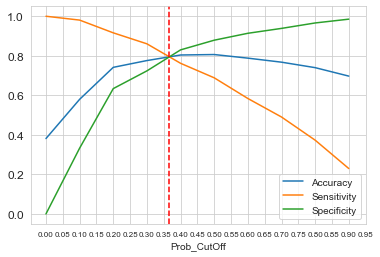

In [194]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
cutoff_df.plot.line(x='Prob_CutOff', y=['Accuracy','Sensitivity','Specificity'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.365, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

**Inference** 

0.365 is the ideal cut-off point

In [195]:
y_train_pred_final['Prediction_Model_1'] = y_train_pred_final['Conversion_Prob'].map( lambda x: 1 if x > 0.365 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) # deleting the unnecessary columns
y_train_pred_final.head()

,Lead_Converted,Conversion_Prob,Lead_id,Prediction_Model_1
0,0,0.579268,1871,1
1,0,0.085147,6795,0
2,0,0.356137,3516,0
3,0,0.831222,8105,1
4,0,0.309237,3934,0


In [196]:
# Let's assign Lead_score for the leads in Train Data Set
y_train_pred_final['lead_score_1']=(y_train_pred_final['Conversion_Prob']*100).astype("int64")
y_train_pred_final.sort_values(by='Conversion_Prob',ascending=False)

,Lead_Converted,Conversion_Prob,Lead_id,Prediction_Model_1,lead_score_1
2888,1,0.998951,7219,1,99
2321,1,0.998734,7234,1,99
871,1,0.998518,2378,1,99
1273,1,0.998151,2011,1,99
5216,1,0.997437,161,1,99
...,...,...,...,...,...
3268,0,0.004534,4042,0,0
2720,0,0.003322,4096,0,0
2807,0,0.001814,4101,0,0
4370,0,0.001501,4097,0,0


In [197]:
# Create a matrix to Print the Accuracy, Sensitivity and Specificity
def log_reg_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN/(TN+FP)
    sensitivity = TP/(TP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(TN + FP)
    FNR = FN/(TP + FN)
    pos_pred_val = TP /(TP+FP)
    neg_pred_val = TN /(TN+FN)
    
    print ("Model Accuracy value is              : ", round(accuracy*100,2),"%")
    print ("Model Specificity value is           : ", round(specificity*100,2),"%")
    print ("Model Sensitivity value is           : ", round(sensitivity*100,2),"%")
    print ("Model Precision value is             : ", round(precision*100,2),"%")
    print ("Model Recall value is                : ", round(recall*100,2),"%")
    print ("Model True Positive Rate (TPR)       : ", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)      : ", round(FPR*100,2),"%")
    print ("Model Positive Prediction Value is    : ", round(pos_pred_val*100,2),"%")
    print ("Model Negative Prediction value is   : ", round(neg_pred_val*100,2),"%")

### Confusion Matrix

In [198]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['Lead_Converted'], y_train_pred_final['Prediction_Model_1'] )
print(confusion)

[[3214  788]
 [ 516 1950]]


In [199]:
conf_matrix = confusion_matrix(y_train_pred_final['Lead_Converted'], y_train_pred_final['Prediction_Model_1'] )

log_reg_metrics(conf_matrix)

Model Accuracy value is              :  79.84 %
Model Specificity value is           :  80.31 %
Model Sensitivity value is           :  79.08 %
Model Precision value is             :  71.22 %
Model Recall value is                :  79.08 %
Model True Positive Rate (TPR)       :  79.08 %
Model False Positive Rate (FPR)      :  19.69 %
Model Positive Prediction Value is    :  71.22 %
Model Negative Prediction value is   :  86.17 %


**Inference**
Above model-12 that we built using the Train Dataset, we see it to have accuracy of 79.84% and sensitivity of 80.31%.

### ROC Curve

In [200]:
# Function to plot ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [201]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Lead_Converted'], y_train_pred_final['Conversion_Prob'] , drop_intermediate = False )

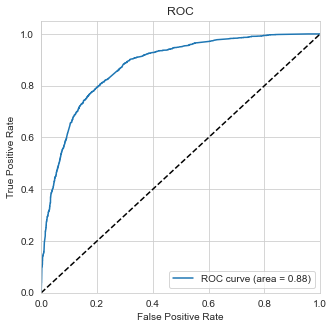

In [202]:
#plotting the ROC curve 
draw_roc(y_train_pred_final['Lead_Converted'], y_train_pred_final['Conversion_Prob'])

**Inference**
We could see ROC value of 0.88 indicating an effective model

### Precision and Recall

In [203]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Lead_Converted'], y_train_pred_final['Conversion_Prob'])

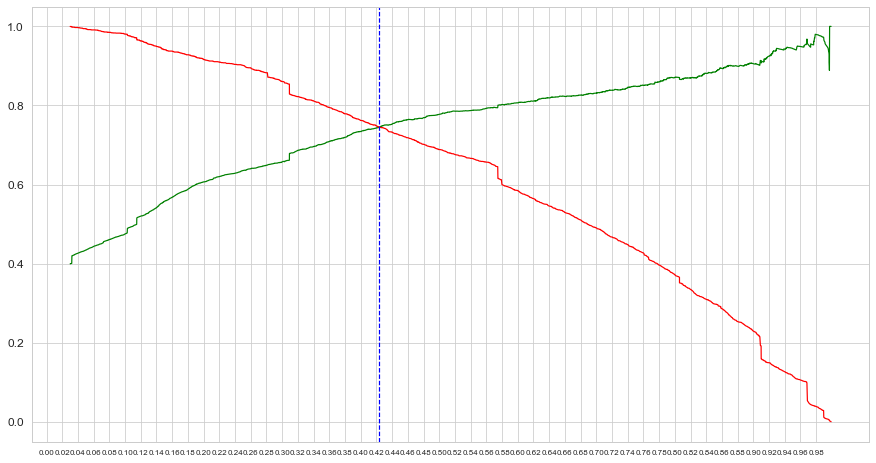

In [204]:
# Plotting the Precision-Recall Trade off Curve
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.423, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.yticks(size=12)

plt.show()

**Inference**
Using the Precision-Recall Method we find 0.423 as the probability cut-off

In [205]:
# plotting the Train dataset again with 0.42 as cutoff
y_train_pred_final['Prediction_Model_2'] = y_train_pred_final['Conversion_Prob'].map( lambda x: 1 if x > 0.423 else 0)
y_train_pred_final.head()

,Lead_Converted,Conversion_Prob,Lead_id,Prediction_Model_1,lead_score_1,Prediction_Model_2
0,0,0.579268,1871,1,57,1
1,0,0.085147,6795,0,8,0
2,0,0.356137,3516,0,35,0
3,0,0.831222,8105,1,83,1
4,0,0.309237,3934,0,30,0


In [206]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['Lead_Converted'], y_train_pred_final['Prediction_Model_2'] )
print(confusion)

[[3372  630]
 [ 627 1839]]


In [207]:
#Data based on cutoff received from Precision-Recall Trade off
conf_matrix = confusion_matrix(y_train_pred_final['Lead_Converted'], y_train_pred_final['Prediction_Model_2'] )
log_reg_metrics(conf_matrix)

Model Accuracy value is              :  80.57 %
Model Specificity value is           :  84.26 %
Model Sensitivity value is           :  74.57 %
Model Precision value is             :  74.48 %
Model Recall value is                :  74.57 %
Model True Positive Rate (TPR)       :  74.57 %
Model False Positive Rate (FPR)      :  15.74 %
Model Positive Prediction Value is    :  74.48 %
Model Negative Prediction value is   :  84.32 %


**Inference**
    We observe increase in Accuracy with the probability cut off value from Precision and Recall method. But the Sensitivity has come down from 79.08% to 74.57%. We will go ahead with 0.365 as the cut off value.

# Model Evaluation

In [208]:
# Scaling the test dataset :
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other
4269,0,1.749143,0.964504,2.117849,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7766,0,0.662077,-0.777416,1.553761,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9199,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4359,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [209]:
# Selecting only the columns used in final model of Train Dataset
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,Specialization_Select
4269,0,0.964504,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2376,0,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
7766,0,-0.777416,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9199,0,-0.885371,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4359,0,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [210]:
#adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Specialization_Select'],
      dtype='object')

In [211]:
# Predicting the final test model 
y_test_pred = log_model12.predict(X_test_sm)

In [212]:
#checking the top 10 rows
y_test_pred[:10]

4269    0.431681
2376    0.908252
7766    0.341248
9199    0.102717
4359    0.909861
9186    0.589317
1631    0.514324
8963    0.203567
8007    0.081162
5324    0.368003
dtype: float64

In [213]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.431681
2376,0.908252
7766,0.341248
9199,0.102717
4359,0.909861


In [214]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [215]:
# Putting CustID to index
y_test_df['Lead_id'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Lead_id,0
0,1,4269,0.431681
1,1,2376,0.908252
2,1,7766,0.341248
3,0,9199,0.102717
4,1,4359,0.909861


In [216]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Lead_Converted'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead_id','Lead_Converted','Conversion_Prob'], axis=1)
y_pred_final.head()

,Lead_id,Lead_Converted,Conversion_Prob
0,4269,1,0.431681
1,2376,1,0.908252
2,7766,1,0.341248
3,9199,0,0.102717
4,4359,1,0.909861


In [217]:
y_pred_final['Final_Pred_Model_1'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.335 else 0)
y_pred_final.head()

,Lead_id,Lead_Converted,Conversion_Prob,Final_Pred_Model_1
0,4269,1,0.431681,1
1,2376,1,0.908252,1
2,7766,1,0.341248,1
3,9199,0,0.102717,0
4,4359,1,0.909861,1


In [218]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final['Lead_Converted'], y_pred_final['Final_Pred_Model_1'] )
print(confusion)

[[1302  375]
 [ 218  877]]


In [219]:
conf_matrix = confusion_matrix(y_pred_final['Lead_Converted'], y_pred_final['Final_Pred_Model_1'])

log_reg_metrics(conf_matrix)

Model Accuracy value is              :  78.61 %
Model Specificity value is           :  77.64 %
Model Sensitivity value is           :  80.09 %
Model Precision value is             :  70.05 %
Model Recall value is                :  80.09 %
Model True Positive Rate (TPR)       :  80.09 %
Model False Positive Rate (FPR)      :  22.36 %
Model Positive Prediction Value is    :  70.05 %
Model Negative Prediction value is   :  85.66 %


**Inference**
Sensitivity in Test dataset is at 80.09% Vs Train Set is at 79.08% which is almost close. The model built using Train dataset is stable as it proved to be stable when we tested using Test dataset

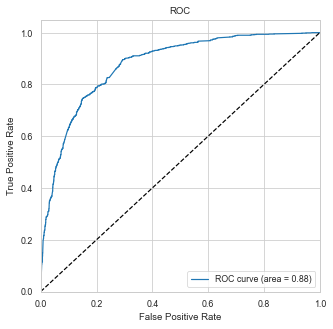

In [220]:
# Invoking the functio to draw ROC curve

draw_roc( y_pred_final['Lead_Converted'], y_pred_final['Conversion_Prob'])

**Inference**
ROC value is same at 0.88 in the test dataset as well

In [221]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_pred_final['Lead_Converted'], y_pred_final['Final_Pred_Model_1'] ) )

              precision    recall  f1-score   support

           0       0.86      0.78      0.81      1677
           1       0.70      0.80      0.75      1095

    accuracy                           0.79      2772
   macro avg       0.78      0.79      0.78      2772
weighted avg       0.79      0.79      0.79      2772



# Conclusion

#### Leads with high probability of Conversion

In [222]:
# Let's assign Lead_score for the leads in Test Data Set : 
y_pred_final['lead_score']=(y_pred_final['Conversion_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Conversion_Prob',ascending=False)

,Lead_id,Lead_Converted,Conversion_Prob,Final_Pred_Model_1,lead_score
2589,7327,1,0.998482,1,99
224,8120,1,0.998470,1,99
603,6243,1,0.997982,1,99
1706,4707,1,0.996541,1,99
2740,6944,1,0.995622,1,99
...,...,...,...,...,...
321,1012,0,0.001807,0,0
2521,8733,0,0.001726,0,0
1136,4098,0,0.001571,0,0
597,3682,0,0.001437,0,0


#### Key Features that are drivers for Lead Conversion

**Inference**
Below are the key features that are driving factors for lead conversion.

In [223]:
# Let's look into final model features and coefficients 
pd.options.display.float_format = '{:.2f}'.format
final_parameters = log_model12.params[1:]
final_parameters

Do Not Email                              -1.14
Total Time Spent on Website                1.09
Lead Origin_Landing Page Submission       -1.19
Lead Origin_Lead Add Form                  3.09
Lead Source_Direct Traffic                -0.26
Lead Source_Olark Chat                     1.10
Lead Source_Welingak Website               2.25
Last Activity_Converted to Lead           -1.15
Last Activity_Email Bounced               -0.97
Last Activity_Email Link Clicked          -0.51
Last Activity_Form Submitted on Website   -0.94
Last Activity_Had a Phone Conversation     2.02
Last Activity_Olark Chat Conversation     -1.36
Last Activity_Others                      -1.63
Last Activity_Page Visited on Website     -0.54
Last Activity_SMS Sent                     1.10
Specialization_Hospitality Management     -0.93
Specialization_Others                     -2.36
Specialization_Select                     -1.12
dtype: float64

In [224]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

Do Not Email                              -36.78
Total Time Spent on Website                35.32
Lead Origin_Landing Page Submission       -38.50
Lead Origin_Lead Add Form                 100.00
Lead Source_Direct Traffic                 -8.38
Lead Source_Olark Chat                     35.47
Lead Source_Welingak Website               72.79
Last Activity_Converted to Lead           -37.22
Last Activity_Email Bounced               -31.52
Last Activity_Email Link Clicked          -16.51
Last Activity_Form Submitted on Website   -30.43
Last Activity_Had a Phone Conversation     65.51
Last Activity_Olark Chat Conversation     -44.17
Last Activity_Others                      -52.88
Last Activity_Page Visited on Website     -17.40
Last Activity_SMS Sent                     35.76
Specialization_Hospitality Management     -29.97
Specialization_Others                     -76.51
Specialization_Select                     -36.39
dtype: float64

<Figure size 864x576 with 0 Axes>

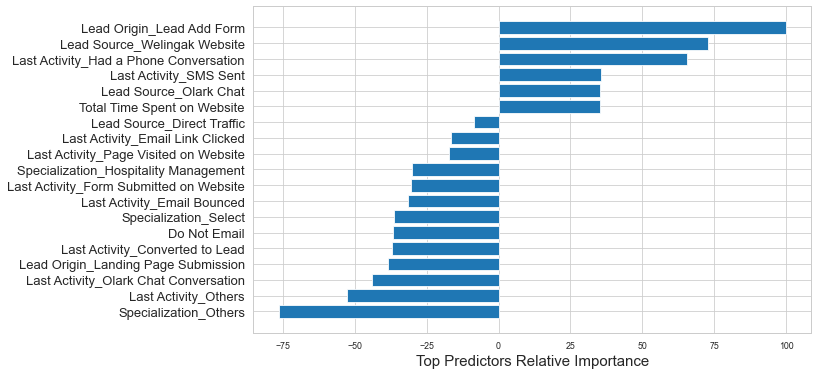

In [225]:
# Plotting the predictors based on their relative importance
top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()